#ASSIGNMENT 4

#EC9630 MACHINE LEARNING
#CLUSTERING
IRIS




**S.KAMSAYINI**

**2020/E/185**

**SEMESTER 6**

**11 AUG 2024**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import sys
import os

In [3]:
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')


#DATA PREPARATION

In [4]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

In [5]:
# Data preparation
X = iris.drop("species", axis=1)
y = iris["species"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
iris_scaled = pd.DataFrame(X_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
print("Initial Data:")
print(iris.head())

Initial Data:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print("\nData Information:")
iris.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("\nStatistical Summary:")
print(iris.describe())


Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
iris[0:10]

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [ ]:
# Check for null values
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print(iris.duplicated())

# Check for duplicates
duplicates = iris[iris.duplicated()]
print(f"Duplicate Rows:\n{duplicates}")
#if any true
# Remove duplicate rows if necessary
# data = data.drop_duplicates()
#The Iris dataset includes one duplicate row, which is generally acknowledged and does not typically necessitate removal for most educational purposes.
# Removing this duplicate may slightly imbalance the class distribution but is not usually a concern for the standard analyses performed with this dataset.
#Minor Impact: The duplicate row is a small part of the dataset (1 out of 150), so removing it has minimal impact on overall analysis.

#Class Balance: Removing one duplicate row slightly affects the balance (49 vs. 50 samples), but this minor imbalance usually does not impact the results significantly in educational or demonstration contexts.


0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool
Duplicate Rows:
     sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica


In [ ]:
# Optionally, remove duplicates
data_cleaned = iris.drop_duplicates()

#EXPLORATAORY DATA ANALYSIS FURTHER

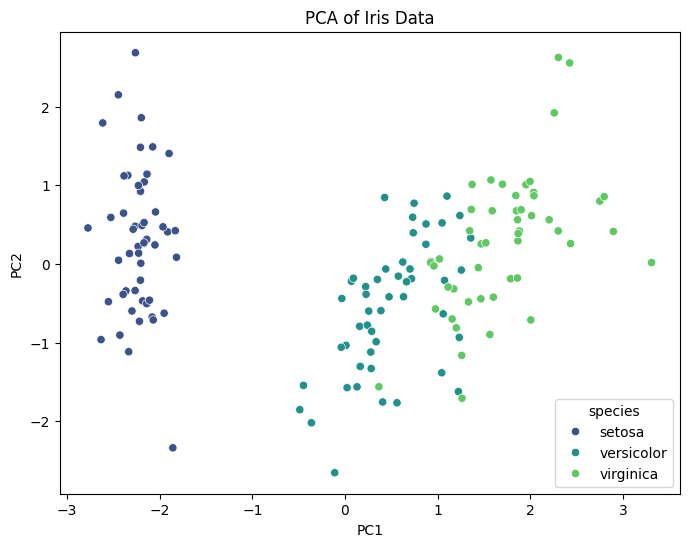

In [ ]:
# Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='viridis')
plt.title('PCA of Iris Data')
plt.show()

For small datasets like iris, it is not necessary to consider about PCA.

In [ ]:
# Correlation matrix
print(X.corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [ ]:
iris_scaled.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
iris_scaled.shape

(150, 4)

In [ ]:
iris_scaled.describe(include='all')

sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -7.815970e-16 -4.263256e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00
50%   -5.250608e-02 -1.319795e-01  3.364776e-01  1.325097e-01
75%    6.745011e-01  5.586108e-01  7.627583e-01  7.906707e-01
max    2.492019e+00  3.090775e+00  1.785832e+00  1.712096e+00

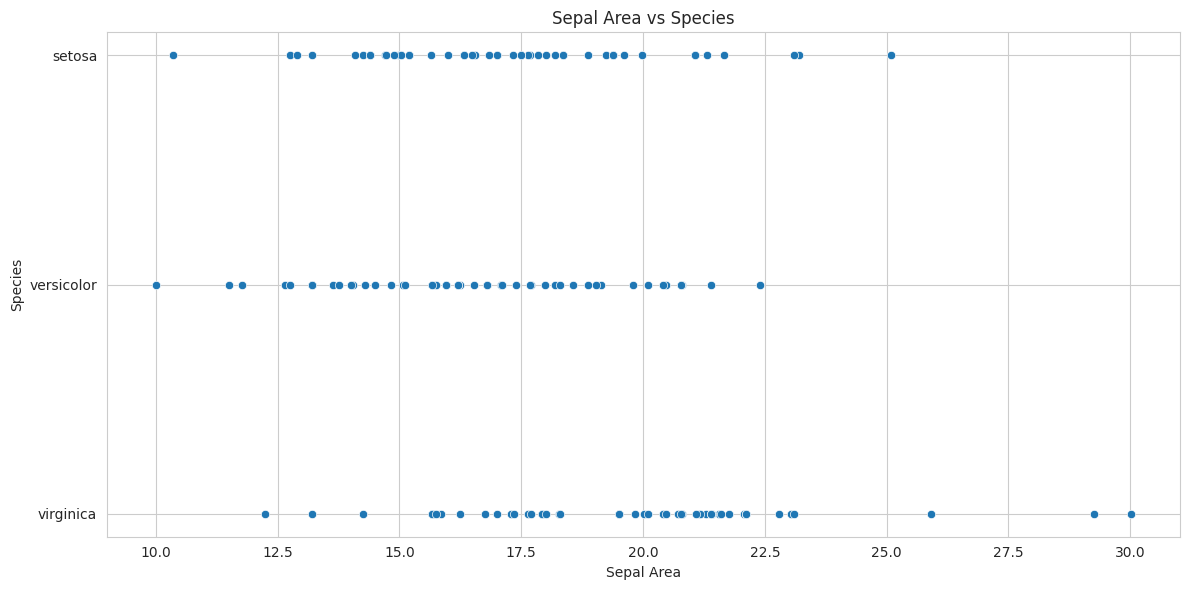

In [ ]:
#This step might not be necessary for the Iris dataset,
# Feature Engineering
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']

# Visualize the new features
plt.figure(figsize=(12, 6))

# Sepal Area

sns.scatterplot(x='sepal_area', y='species', data=iris)
plt.title('Sepal Area vs Species')
plt.xlabel('Sepal Area')
plt.ylabel('Species')
plt.tight_layout()
plt.show()



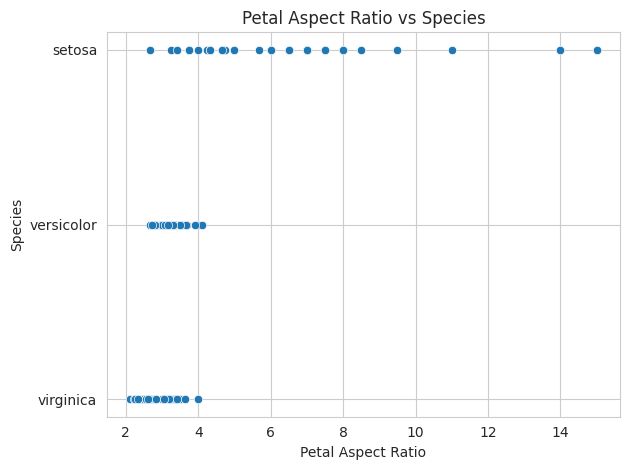

In [ ]:
# Petal Aspect Ratio
iris['petal_aspect_ratio'] = iris['petal_length'] / iris['petal_width']
sns.scatterplot(x='petal_aspect_ratio', y='species', data=iris)
plt.title('Petal Aspect Ratio vs Species')
plt.xlabel('Petal Aspect Ratio')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

In [ ]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],   # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0       count
species          
setosa         50
versicolor     50
virginica      50

In [ ]:
from sklearn.preprocessing import LabelEncoder

# # Encoding Categorical Variables
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

# Dealing with Class Imbalance
print(iris['species'].value_counts())
# sm = SMOTE()

species
0    50
1    50
2    50
Name: count, dtype: int64


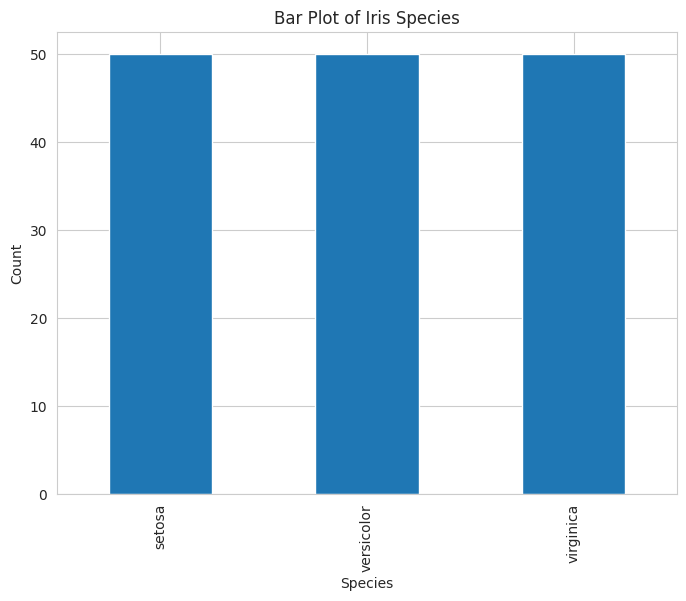

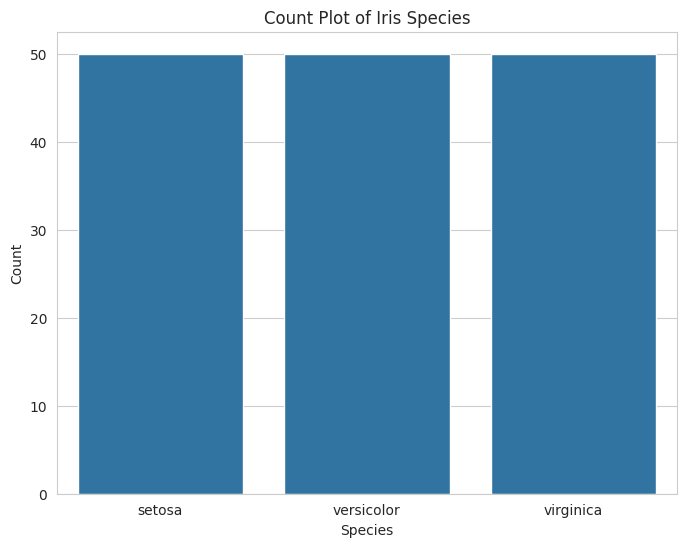

In [ ]:
#Analyzing Categorical Distributions
# Bar Plot
plt.figure(figsize=(8, 6))
iris['species'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Count Plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris)
plt.title('Count Plot of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

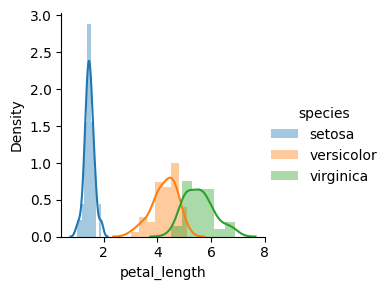

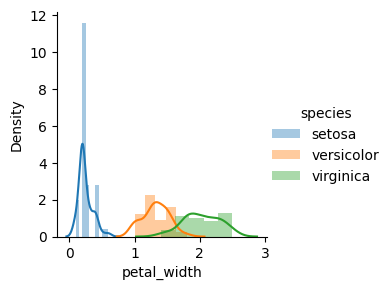

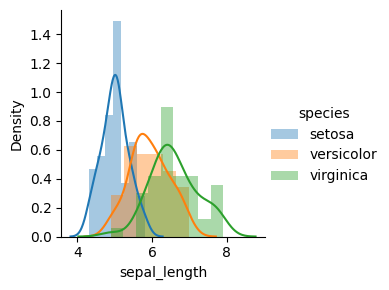

In [ ]:
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_length").add_legend()
plt.show()

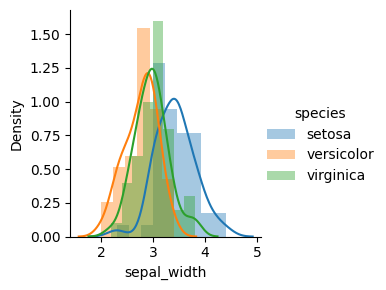

In [ ]:
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_width").add_legend()
plt.show()

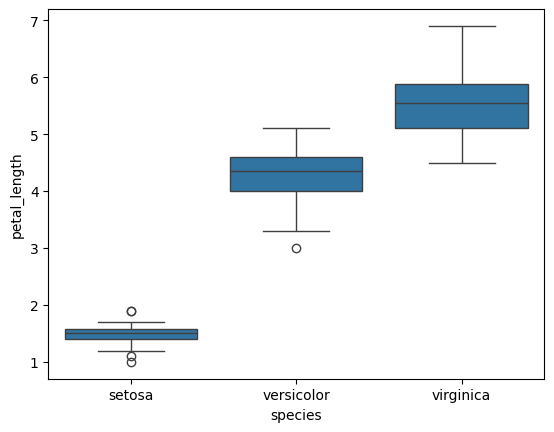

In [ ]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

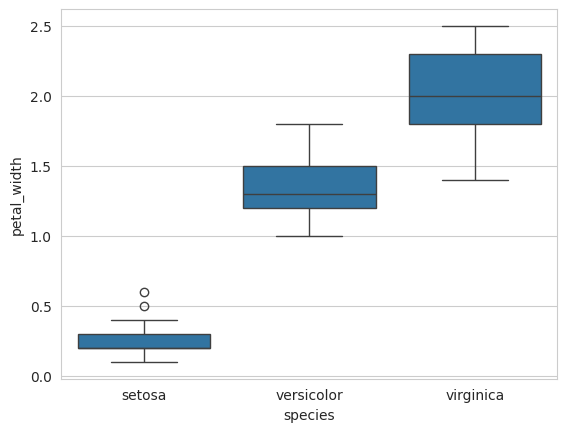

In [ ]:
sns.boxplot(x="species",y="petal_width",data=iris)
plt.show()

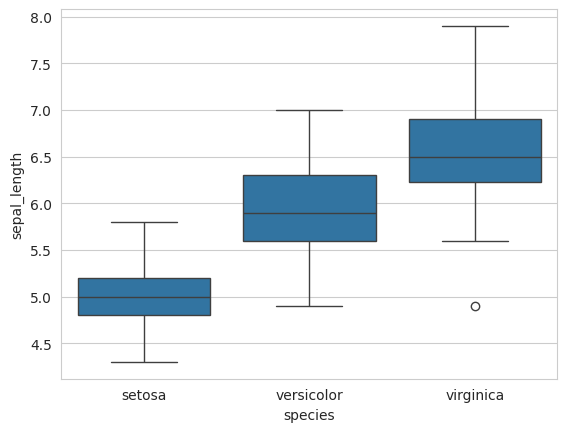

In [ ]:
sns.boxplot(x="species",y="sepal_length",data=iris)
plt.show()

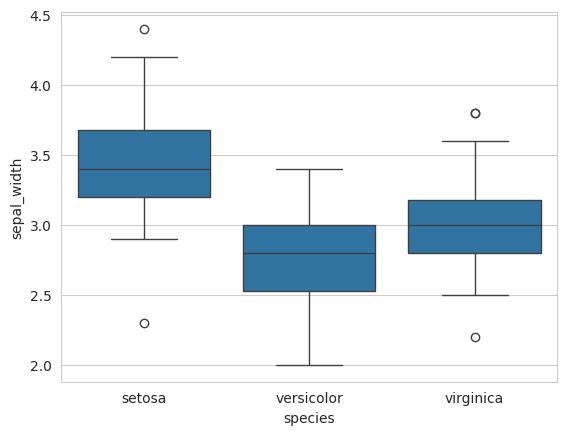

In [ ]:
sns.boxplot(x="species",y="sepal_width",data=iris)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


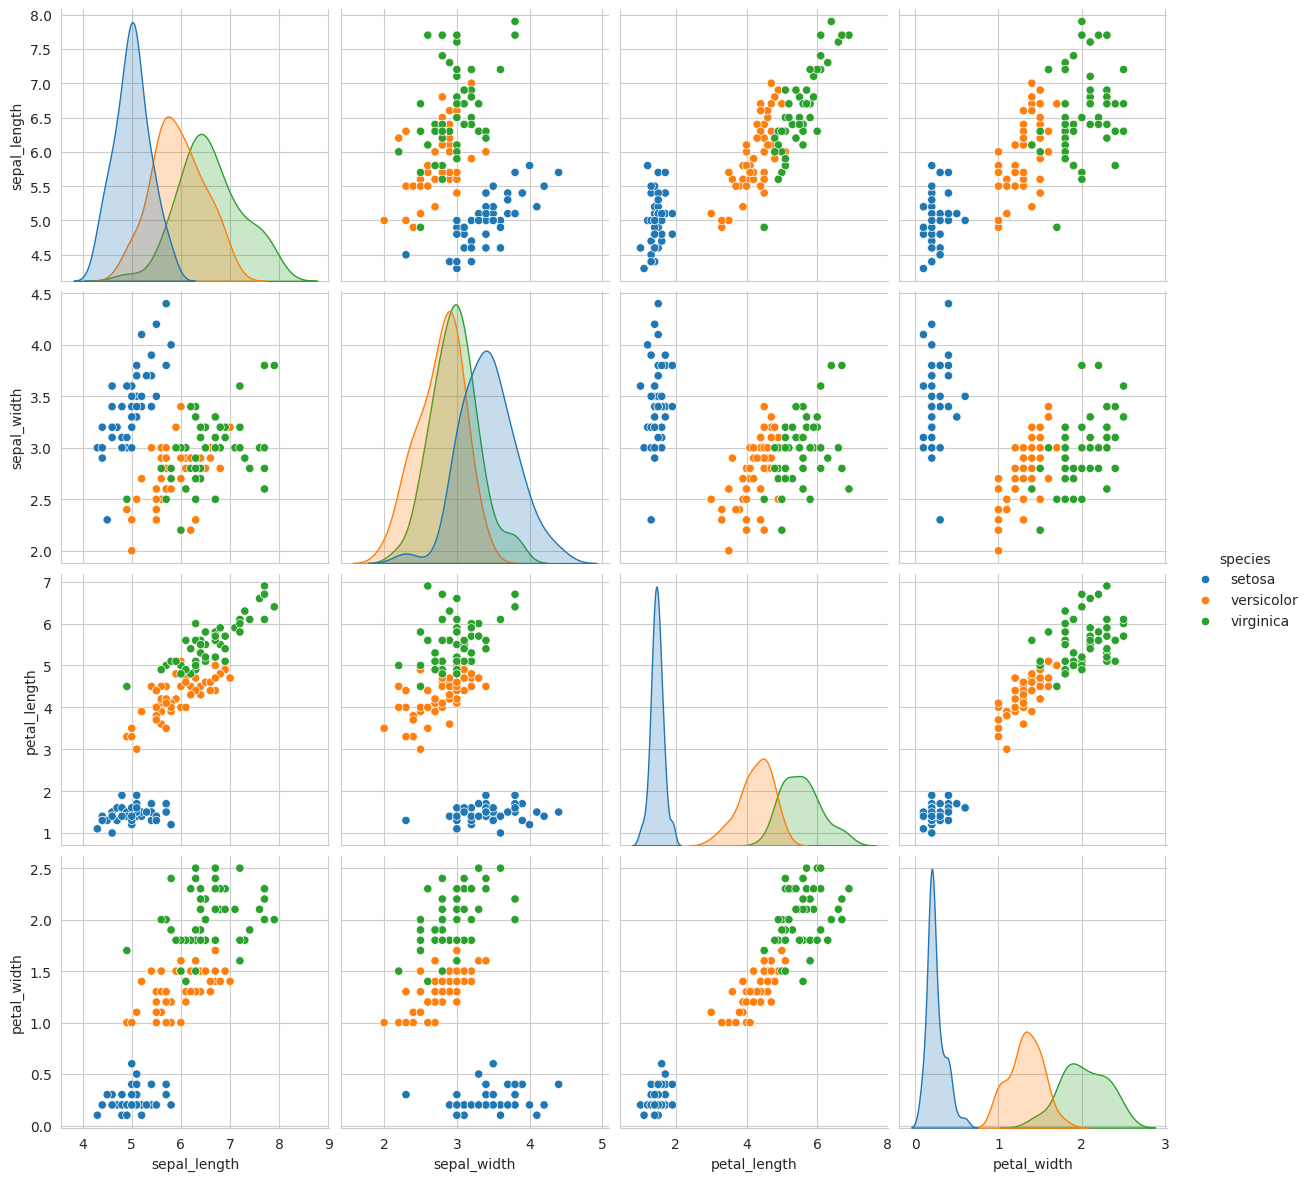

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [ ]:
# Assign numerical values to the 'species' column
iris['species_code'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Correlation analysis
print(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code']].corr())

              sepal_length  sepal_width  petal_length  petal_width  \
sepal_length      1.000000    -0.117570      0.871754     0.817941   
sepal_width      -0.117570     1.000000     -0.428440    -0.366126   
petal_length      0.871754    -0.428440      1.000000     0.962865   
petal_width       0.817941    -0.366126      0.962865     1.000000   
species_code      0.782561    -0.426658      0.949035     0.956547   

              species_code  
sepal_length      0.782561  
sepal_width      -0.426658  
petal_length      0.949035  
petal_width       0.956547  
species_code      1.000000  


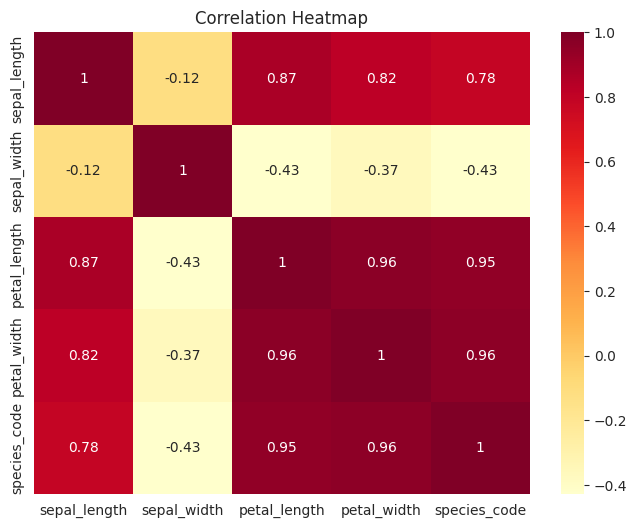

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code']].corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

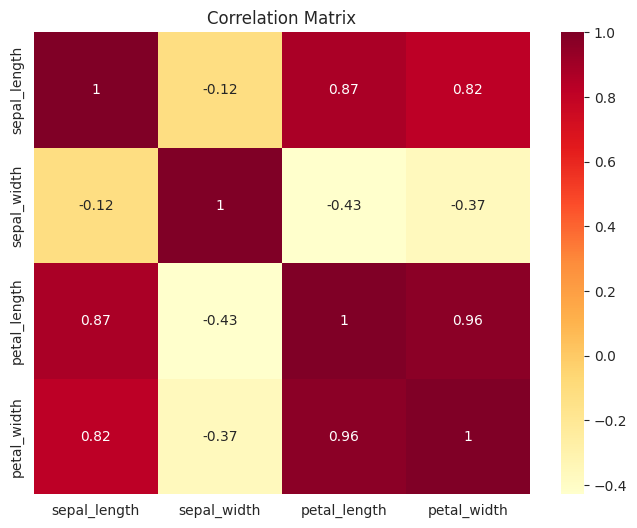

In [ ]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x1200 with 0 Axes>

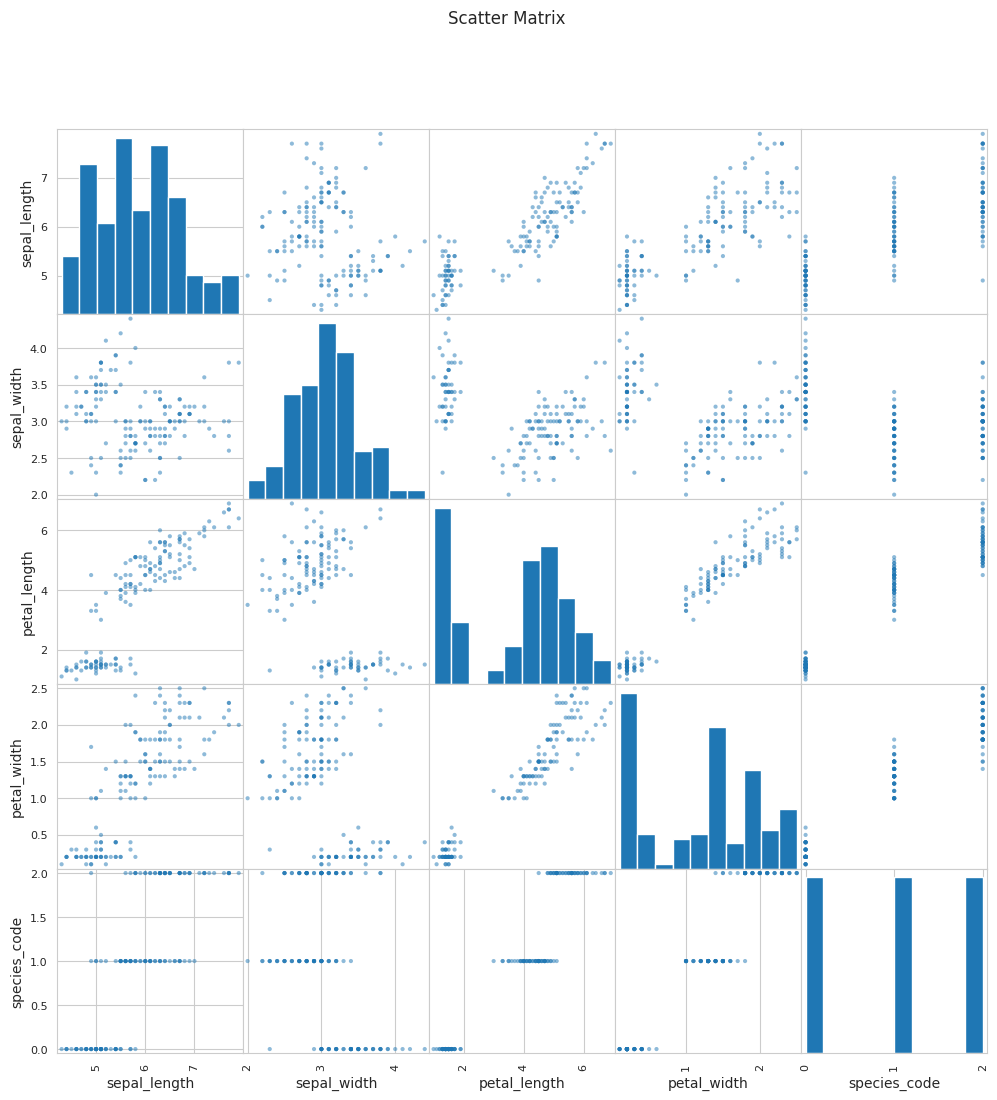

In [ ]:
# Scatter matrix
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code']], diagonal='hist', figsize=(12, 12))
plt.suptitle('Scatter Matrix')
plt.show()

<Figure size 1000x1000 with 0 Axes>

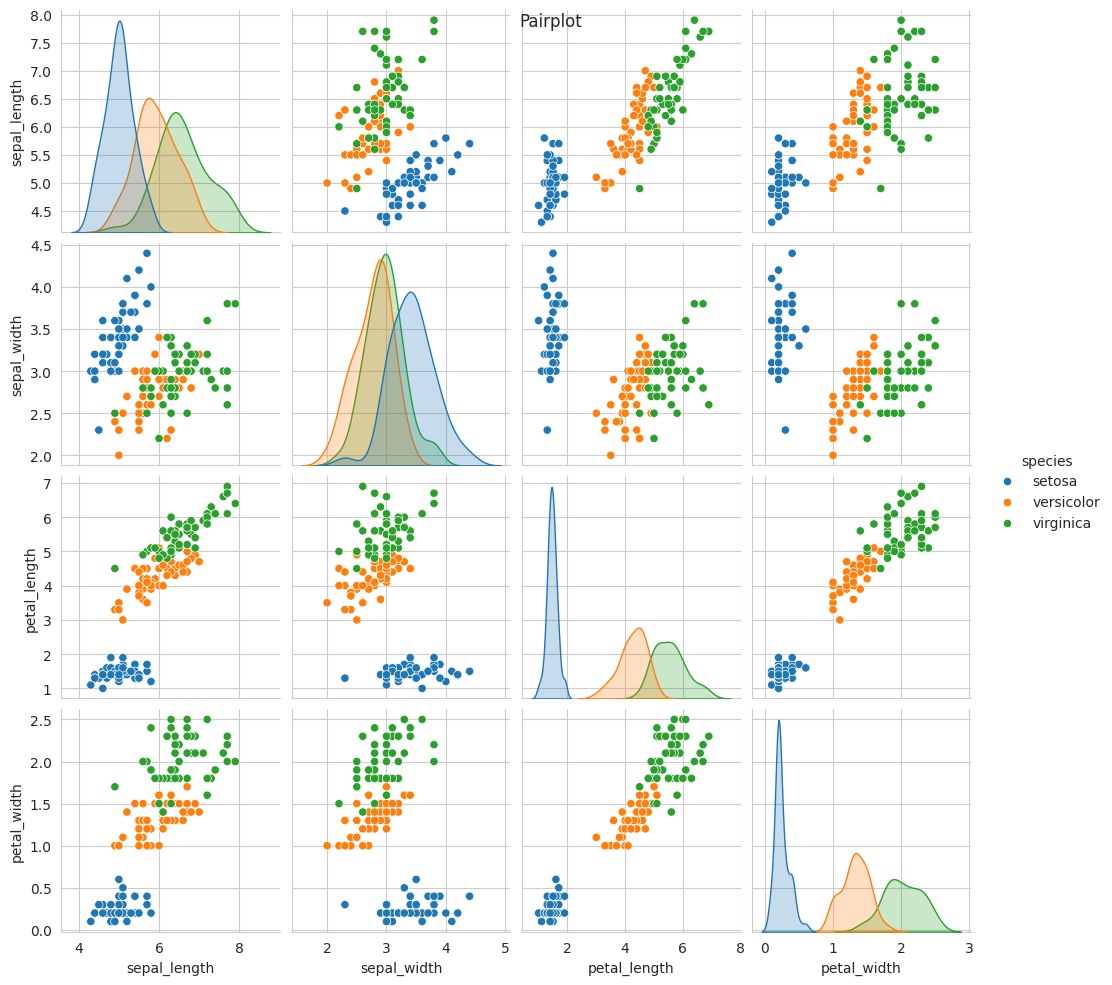

<Figure size 1000x800 with 0 Axes>

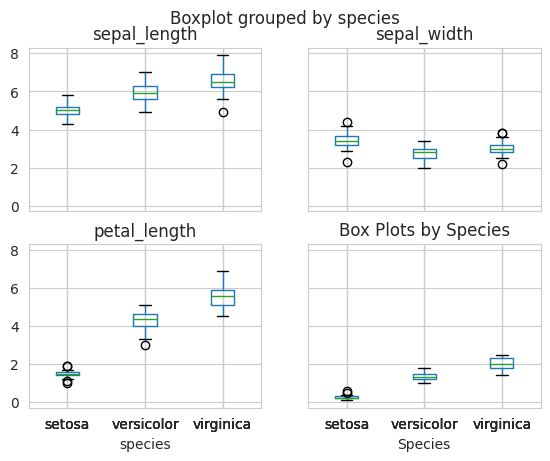

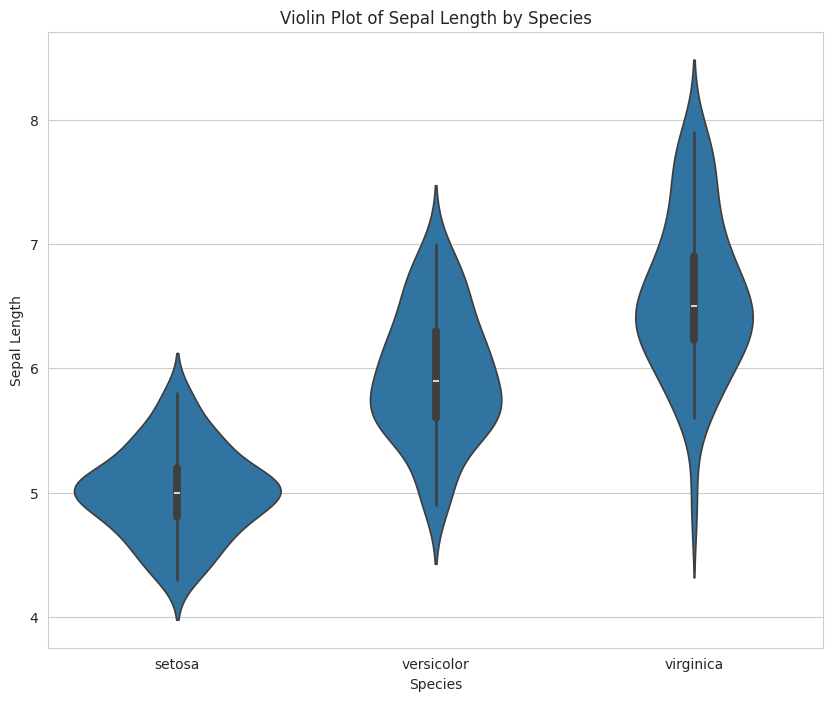

In [ ]:
# Pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(iris, x_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], y_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')
plt.suptitle('Pairplot')
plt.show()

# Box plots
plt.figure(figsize=(10, 8))
iris.boxplot(by='species', column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Box Plots by Species')
plt.xlabel('Species')
plt.ylabel('Measurement')
plt.show()

# Violin plots
plt.figure(figsize=(10, 8))
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()


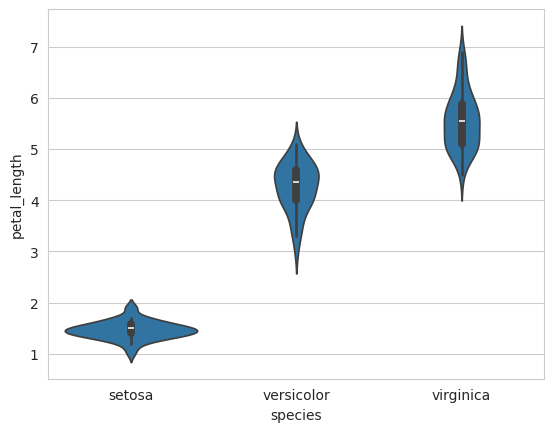

In [ ]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()



<Figure size 1000x800 with 0 Axes>

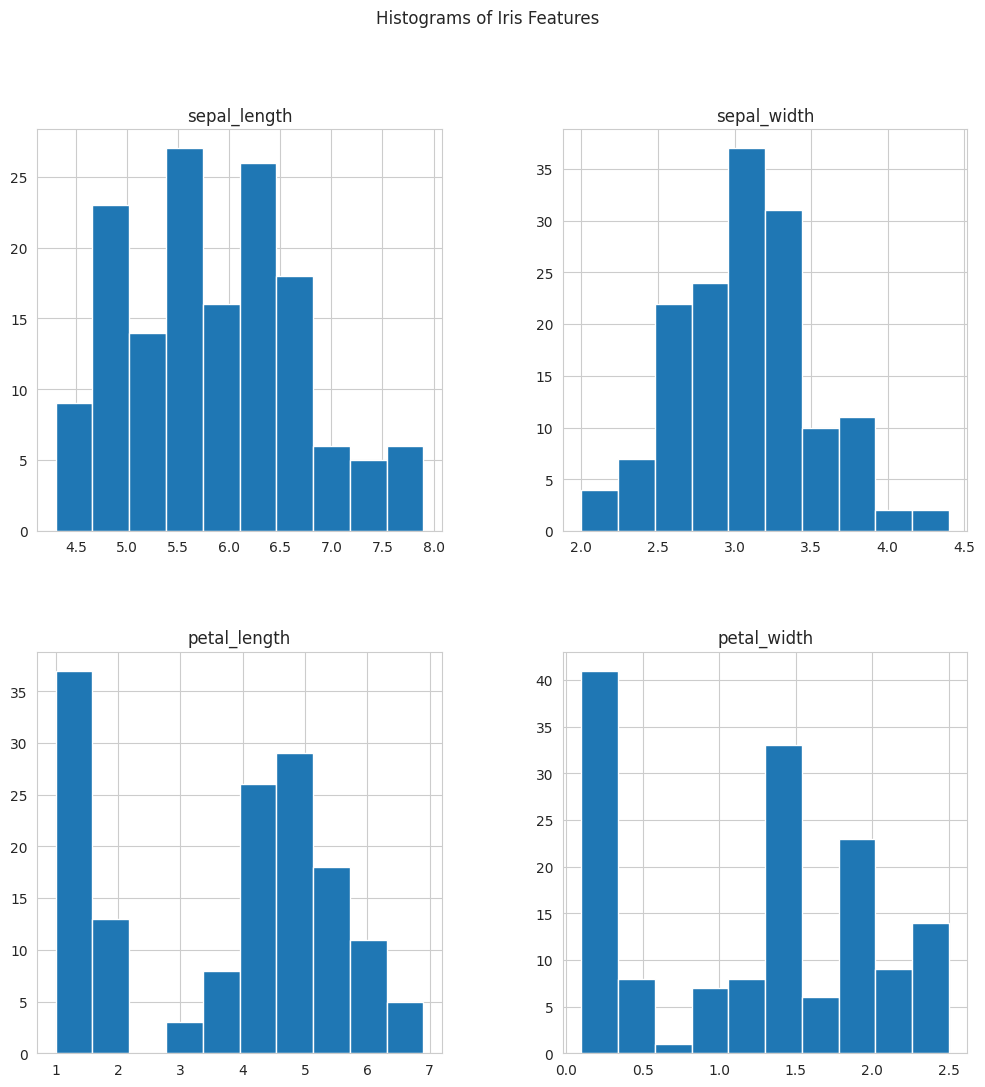

In [ ]:
# Histogram
plt.figure(figsize=(10, 8))
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist(figsize=(12, 12))
plt.suptitle('Histograms of Iris Features')
plt.show()

<ipython-input-30-4ef42379fdfd>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris, x='sepal_length', shade=True)


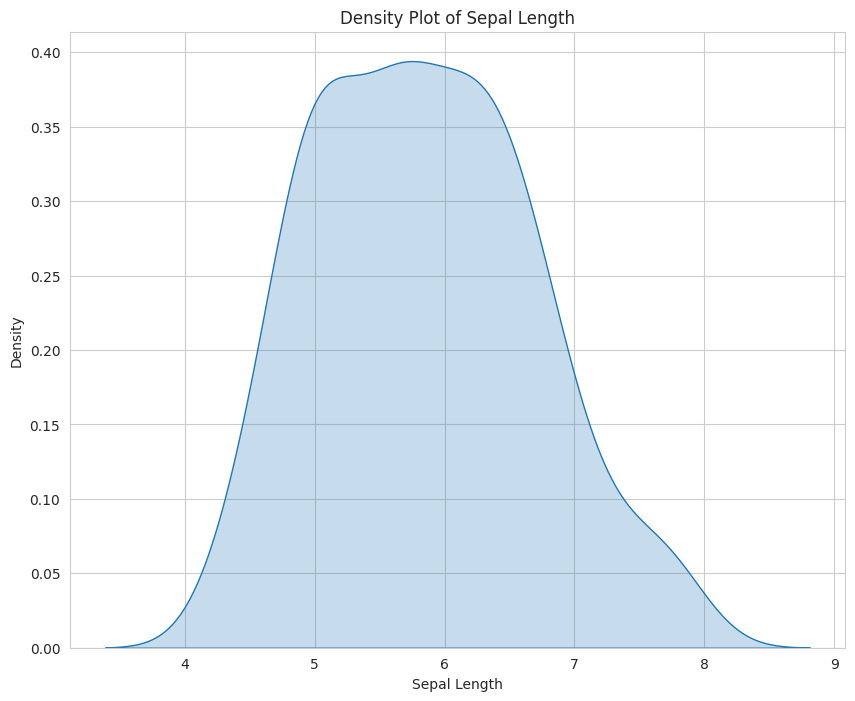

In [ ]:
#Analyzing Univariate Distributions

# Density Plot
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.kdeplot(data=iris, x='sepal_length', shade=True)
plt.title('Density Plot of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.show()

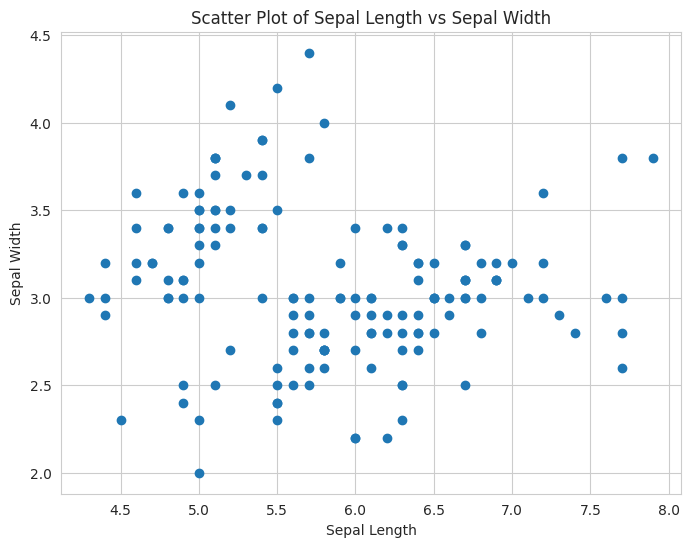

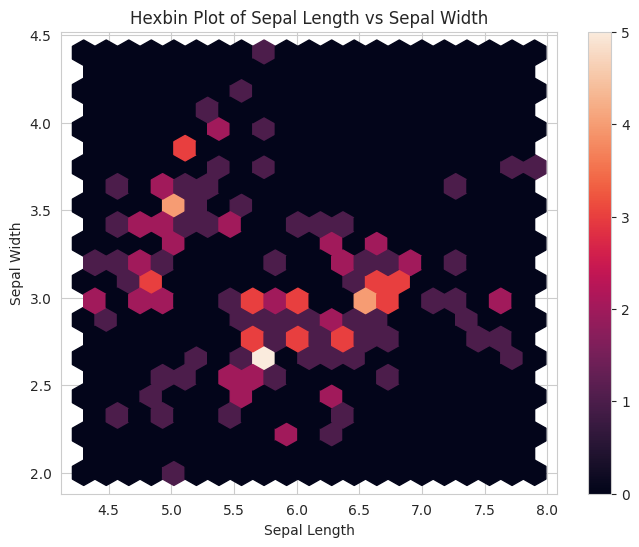

In [ ]:
#Analyzing Bivariate Distributions
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['sepal_length'], iris['sepal_width'], gridsize=20)
plt.colorbar()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hexbin Plot of Sepal Length vs Sepal Width')
plt.show()

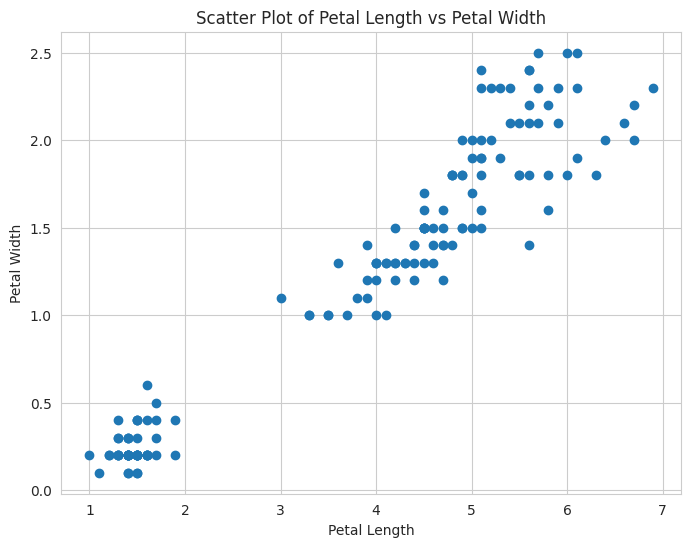

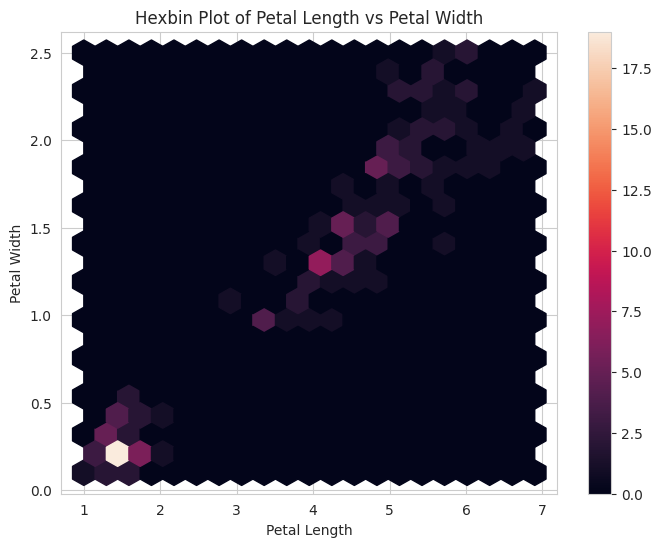

In [ ]:
#Analyzing Bivariate Distributions
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['petal_length'], iris['petal_width'], gridsize=20)
plt.colorbar()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hexbin Plot of Petal Length vs Petal Width')
plt.show()

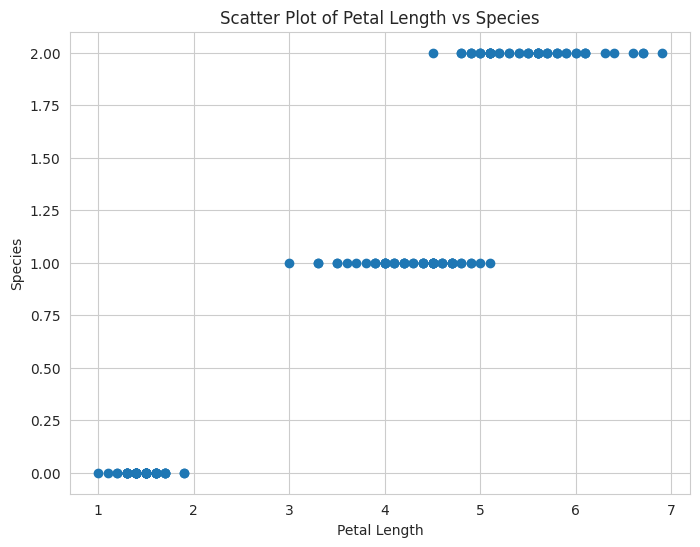

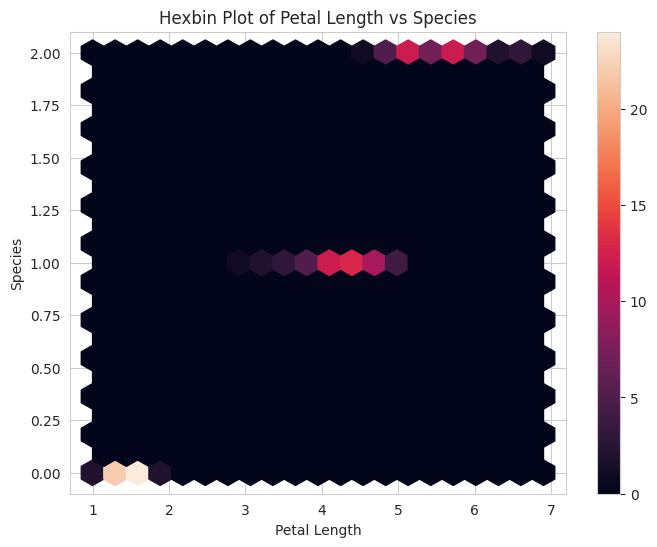

In [ ]:
# Convert species column to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris['species'].map(species_to_num)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['petal_length'], iris['species_num'])
plt.xlabel('Petal Length')
plt.ylabel('Species')
plt.title('Scatter Plot of Petal Length vs Species')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['petal_length'], iris['species_num'], gridsize=20)
plt.colorbar()
plt.xlabel('Petal Length')
plt.ylabel('Species')
plt.title('Hexbin Plot of Petal Length vs Species')
plt.show()

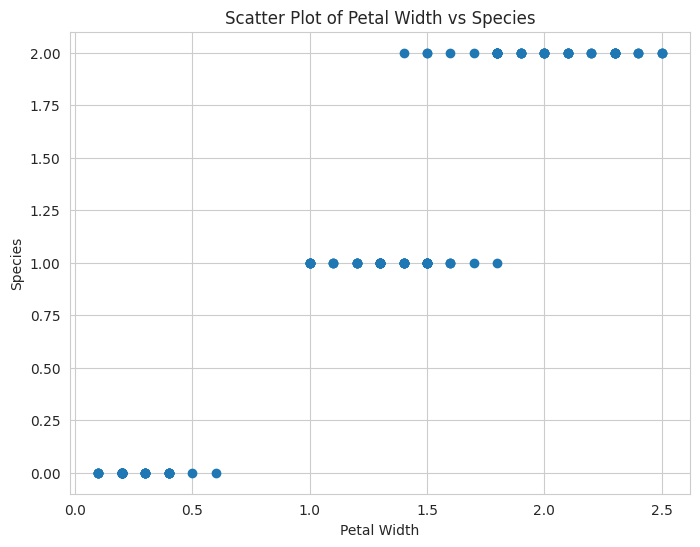

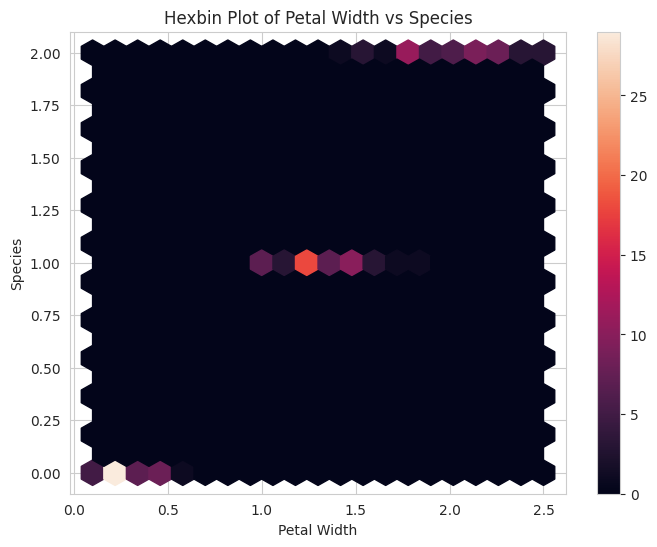

In [ ]:
# Convert species column to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris['species'].map(species_to_num)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['petal_width'], iris['species_num'])
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.title('Scatter Plot of Petal Width vs Species')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['petal_width'], iris['species_num'], gridsize=20)
plt.colorbar()
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.title('Hexbin Plot of Petal Width vs Species')
plt.show()

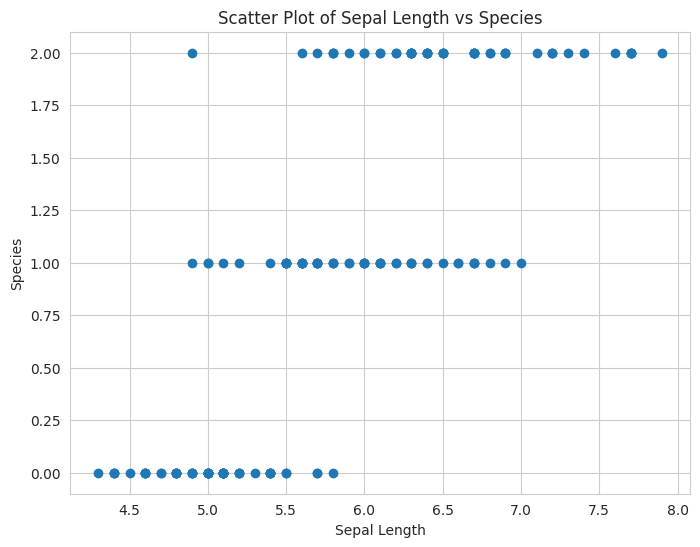

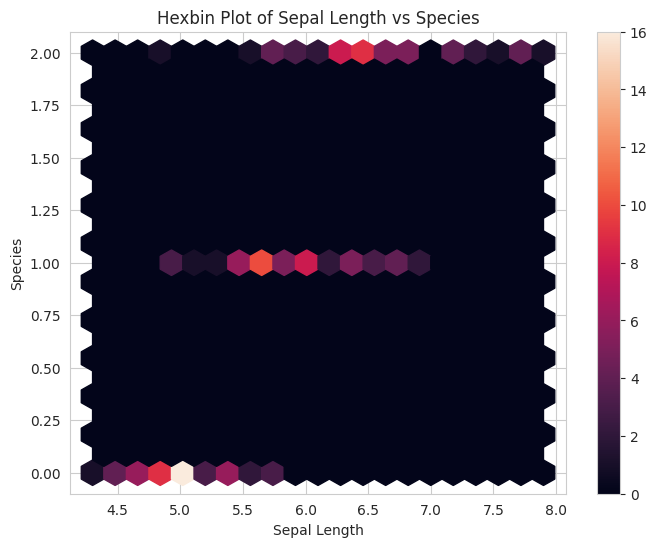

In [ ]:
# Convert species column to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris['species'].map(species_to_num)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['sepal_length'], iris['species_num'])
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.title('Scatter Plot of Sepal Length vs Species')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['sepal_length'], iris['species_num'], gridsize=20)
plt.colorbar()
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.title('Hexbin Plot of Sepal Length vs Species')
plt.show()

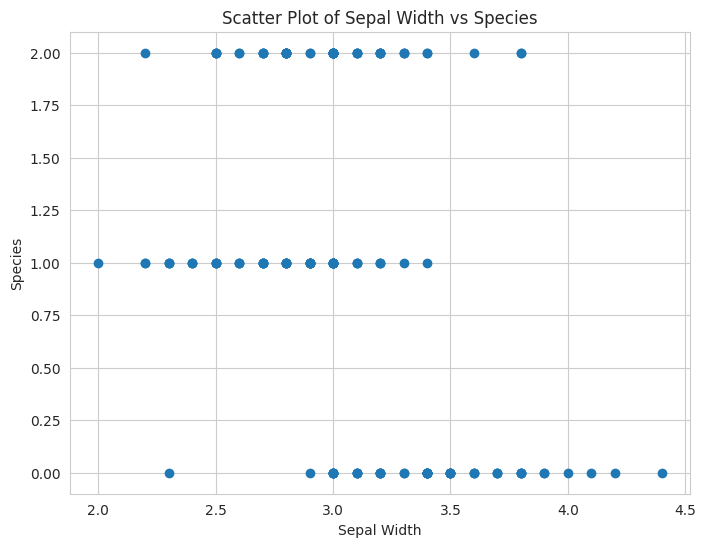

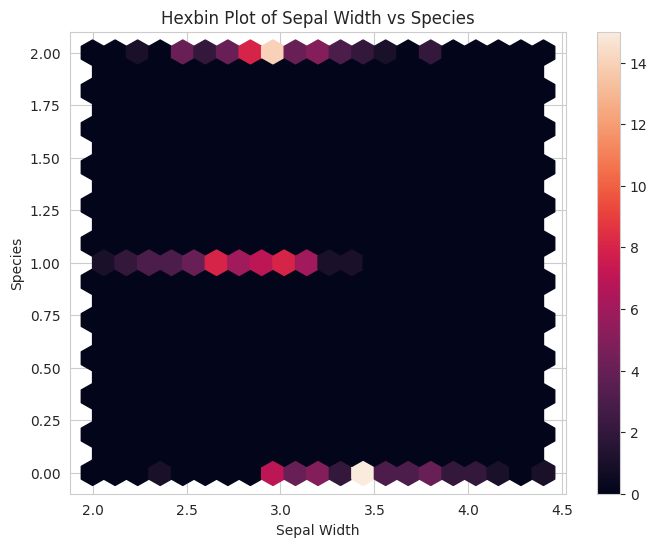

In [ ]:
# Convert species column to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris['species'].map(species_to_num)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(iris['sepal_width'], iris['species_num'])
plt.xlabel('Sepal Width')
plt.ylabel('Species')
plt.title('Scatter Plot of Sepal Width vs Species')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(iris['sepal_width'], iris['species_num'], gridsize=20)
plt.colorbar()
plt.xlabel('Sepal Width')
plt.ylabel('Species')
plt.title('Hexbin Plot of Sepal Width vs Species')
plt.show()

<Figure size 1000x1000 with 0 Axes>

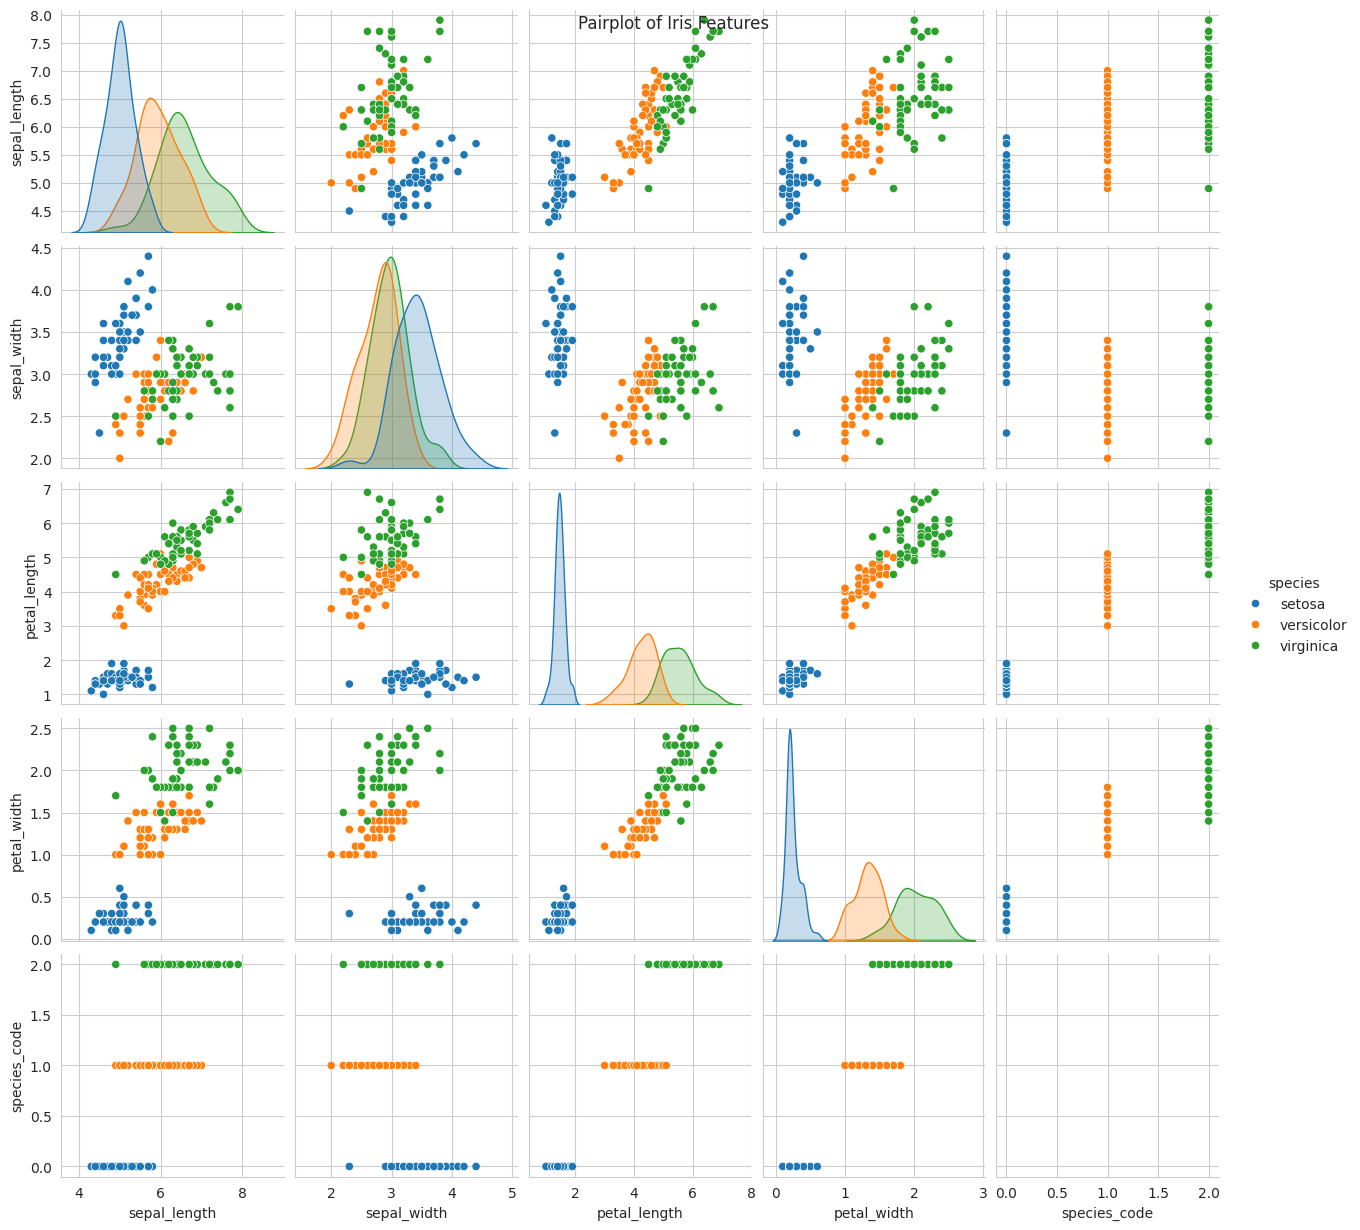

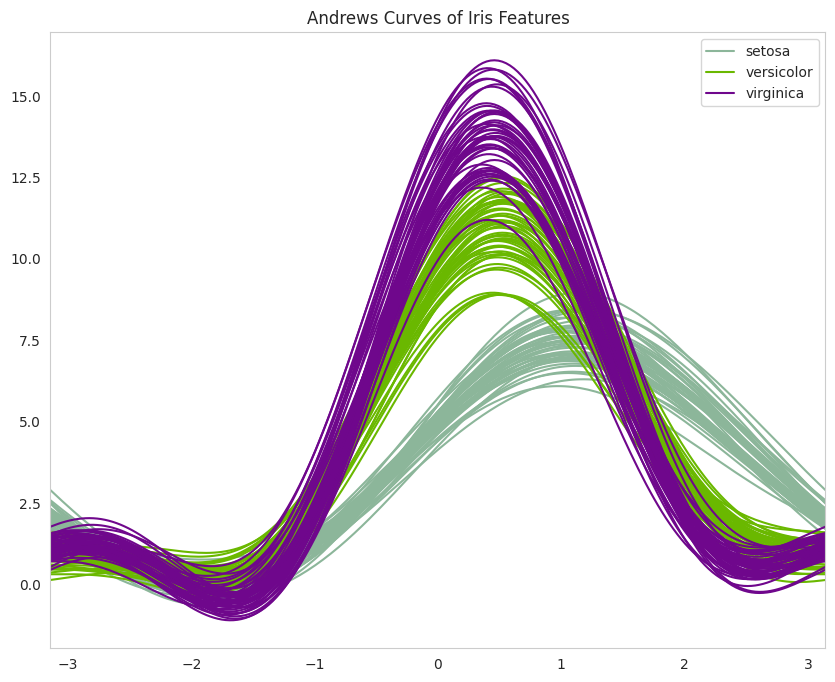

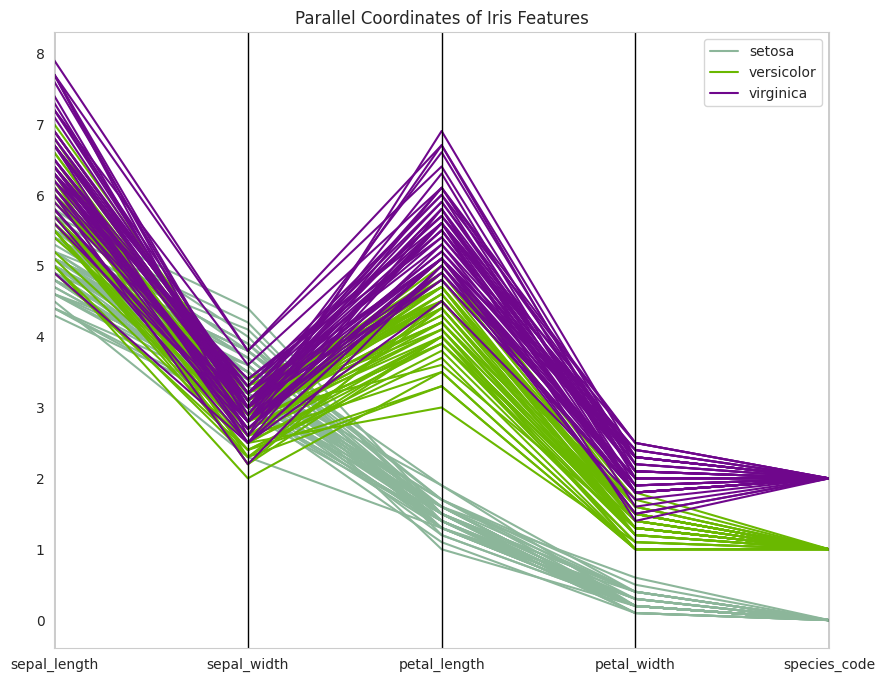

In [ ]:
#Analyzing Multivariate Distributions
# Pairplot
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot of Iris Features')
plt.show()

# Andrews Curves
from pandas.plotting import andrews_curves
plt.figure(figsize=(10, 8))
andrews_curves(iris, 'species')
plt.title('Andrews Curves of Iris Features')
plt.show()

# Parallel Coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10, 8))
parallel_coordinates(iris, 'species')
plt.title('Parallel Coordinates of Iris Features')
plt.show()

In [ ]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the features
z_scores = np.abs(stats.zscore(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))
print(z_scores )

     sepal_length  sepal_width  petal_length  petal_width
0        0.900681     1.019004      1.340227     1.315444
1        1.143017     0.131979      1.340227     1.315444
2        1.385353     0.328414      1.397064     1.315444
3        1.506521     0.098217      1.283389     1.315444
4        1.021849     1.249201      1.340227     1.315444
..            ...          ...           ...          ...
145      1.038005     0.131979      0.819596     1.448832
146      0.553333     1.282963      0.705921     0.922303
147      0.795669     0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662     0.131979      0.762758     0.790671

[150 rows x 4 columns]


In [ ]:
outlier_mask = (z_scores > 3).any(axis=1)
print(outlier_mask)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scaled Iris Dataset')
plt.show()

# Summary statistics
print(X_scaled.describe())

OTHER WAYS CONSIDERING FURTHER DATA PREAPARATION FEATURE SELECTION METHODS CAN BE POSSIBLE, BUT NOT NECESSARY HERE IN IRIS

In [ ]:
#done another ways
# ## Data preparation
# X = iris.drop("species", axis=1)
# y = iris["species"]

## optional; If otliers found, need to hande them as below if necessary
# # Handle Outliers (using z-scores)
# z_scores = np.abs(stats.zscore(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))
# outlier_mask = (z_scores > 3).any(axis=1)
##if any outlier mask found below steps can be done, if necessary
# iris_without_outliers = iris.loc[~outlier_mask]

##Resampling using SMOTE:
##The Iris dataset is relatively balanced with three classes of equal size (50 samples each).
##SMOTE is typically used to address class imbalance issues, which is not a concern in this case.
#sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X, y)
## Feature scaling
# scaler = StandardScaler()
# X_I = iris_without_outliers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# X_I_scaled = scaler.fit_transform(X_I)
# y_I = iris_without_outliers['species']
# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_I_scaled, y_I, test_size=0.2, random_state=42)

# #Feature Selection using Correlation:
# #The Iris dataset has only four features, making it small enough to use all features without causing overfitting or high computational costs.
# Feature selection is more critical in datasets with a large number of features to reduce dimensionality and improve model performance.

# # Convert scaled data back to DataFrame for easier handling of column names
# X_I_scaled_df = pd.DataFrame(X_I_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# corr_matrix = X_I_scaled_df.corr().abs()

# # Select top features based on correlation with a specific feature ('petal_length' in this case)
# top_features = corr_matrix.nlargest(3, 'petal_length').index

# # Select columns from X_train and X_test based on top_features
# X_train_selected = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])[top_features]
# X_test_selected = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])[top_features]

In [ ]:
# #what we done at start
# # Load the Iris dataset
# iris = sns.load_dataset("iris")
# # Data preparation
# X = iris.drop("species", axis=1)
# y = iris["species"]
# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# iris_scaled = pd.DataFrame(X_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Determine the optimal number of clusters using the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

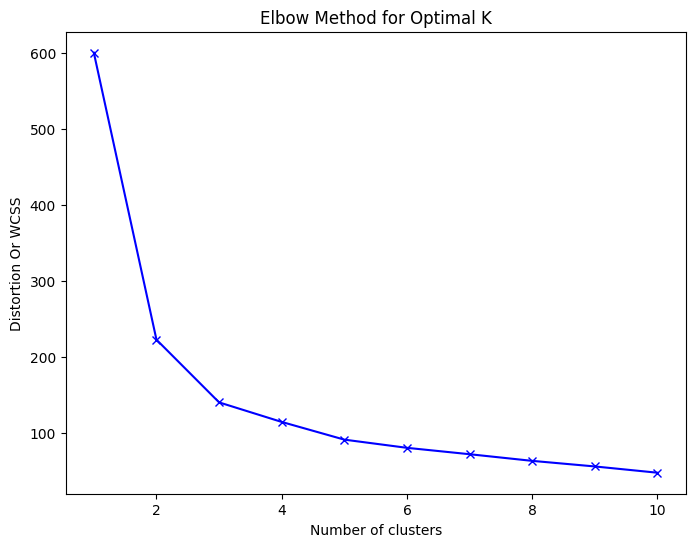

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion Or WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()
# Distortions/ WCSS will continue to minimize as “n” decreases. Plotting distortions/WCSS against clusters will define the shape of the elbow.
#The last bending point of Elbow will define no_of_clusters to choose in K_means clustering kmeans.inertia function returns us within cluster squared distance.
# Hyperparameter tuning for K-means using Grid Search





From the Elbow diagram, It can be concluded appropriate no of clusters are three. Number the of species in the iris dataset and clusters we got after applying KMeans is the same.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Hyperparameter tuning for K-means using Grid Search
from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X, cluster_labels)
    else:
        return -1  # Return a low score if only one cluster is found

param_grid_kmeans = {
    'n_clusters': [ 3],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500]
}

kmeans = KMeans(random_state=42)
grid_search_kmeans = GridSearchCV(kmeans, param_grid_kmeans, scoring=silhouette_scorer, cv=5)
grid_search_kmeans.fit(X_scaled)

best_params_kmeans = grid_search_kmeans.best_params_
best_score_kmeans = grid_search_kmeans.best_score_

print(f"Best Parameters for K-means: {best_params_kmeans}")
print(f"Best Silhouette Score for K-means: {best_score_kmeans:.2f}")


Best Parameters for K-means: {'init': 'random', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10}
Best Silhouette Score for K-means: 0.41


# Hyperparameter tuning for DBSCAN

In [ ]:
# Hyperparameter tuning for DBSCAN
#METHOD 1
# to find the optimal value of epsilon, we have to do the following things to get the optimal value of epsilon.

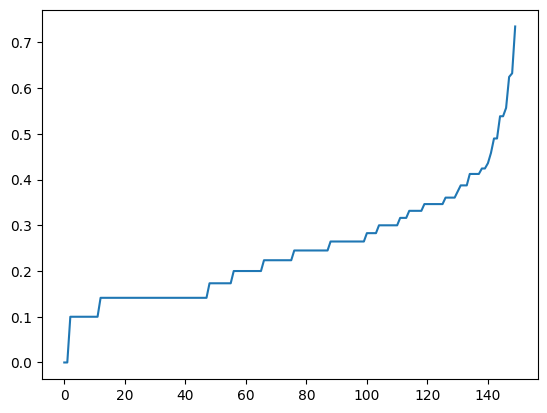

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define parameter grid for DBSCAN
eps_values = [0.1,0.2,0.4]
min_samples_values = [5,6,7]

best_score_dbscan = -1
best_params_dbscan = {'eps': None, 'min_samples': None}
best_davies_bouldin = float('inf')
best_calinski_harabasz = -1

# Iterate over combinations of parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Compute silhouette score (only if more than one cluster is found)
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_scaled, labels)
            davies_bouldin = davies_bouldin_score(X_scaled, labels)
            calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

            # Update best parameters based on silhouette score
            if silhouette > best_score_dbscan:
                best_score_dbscan = silhouette
                best_params_dbscan = {'eps': eps, 'min_samples': min_samples}
                best_davies_bouldin = davies_bouldin
                best_calinski_harabasz = calinski_harabasz

# GridSearchCV is not suitable for DBSCAN due to its nature.
# Manual Tuning: Iterate over parameter values and evaluate clustering performance using metrics like the silhouette score.
# dbscan = DBSCAN()
# grid_search_dbscan = GridSearchCV(dbscan, param_grid_dbscan, scoring=silhouette_scorer, cv=5)
# grid_search_dbscan.fit(X_scaled)
# best_params_dbscan = grid_search_dbscan.best_params_
# best_score_dbscan = grid_search_dbscan.best_score_

print(f"Best Parameters for DBSCAN: {best_params_dbscan}")
print(f"Best Silhouette Score for DBSCAN: {best_score_dbscan:.2f}")
print(f"Best Davies-Bouldin Index for DBSCAN: {best_davies_bouldin:.2f}")
print(f"Best Calinski-Harabasz Index for DBSCAN: {best_calinski_harabasz:.2f}")


Best Parameters for DBSCAN: {'eps': 0.4, 'min_samples': 5}
Best Silhouette Score for DBSCAN: 0.03
Best Davies-Bouldin Index for DBSCAN: 3.25
Best Calinski-Harabasz Index for DBSCAN: 23.48


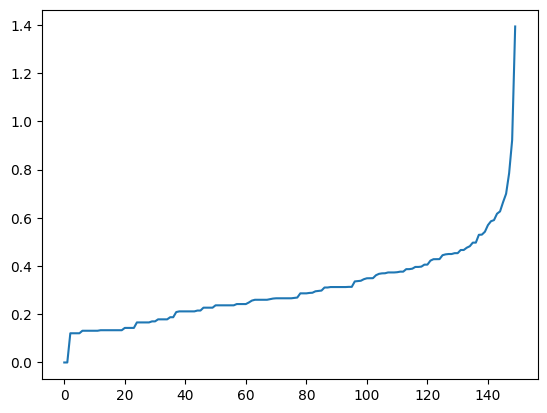

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [ ]:
# it is necessary to find the optimal value of epsilon.
#Need to do the abovecode things to get the optimal value of epsilon.

# Finding Nearest neighbors using scikit learn.
# The reason to find nearest neighbors is to find in which distance range we have a maximum number of points so that, can get the optimal number of clusters according to that.
# Now if take those distances and then by sorting and plotting those distances, can get the exact “Distance”  vs  “no_of_points” graph
# From graph able to find the optimal distance value.

we use the epsilon value directly between 0.4 and 0.6 for X_scaled below by considering above graph.

# Hyperparameter tuning for Hierarchical Clustering using Grid Search
Agglomerative clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Hyperparameter tuning for Hierarchical Clustering using Grid Search
param_grid_hierarchical = {
    'n_clusters': [3,5,7],
    #'metric':['euclidean', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

hierarchical = AgglomerativeClustering()
grid_search_hierarchical = GridSearchCV(hierarchical, param_grid_hierarchical, scoring=silhouette_scorer)
grid_search_hierarchical.fit(X_scaled)

best_params_hierarchical = grid_search_hierarchical.best_params_
best_score_hierarchical = grid_search_hierarchical.best_score_
print(" ")
print(f"Best Parameters for Hierarchical Clustering: {best_params_hierarchical}")
print(f"Best Silhouette Score for Hierarchical Clustering: {best_score_hierarchical:.2f}")



 
Best Parameters for Hierarchical Clustering: {'linkage': 'complete', 'n_clusters': 3}
Best Silhouette Score for Hierarchical Clustering: 0.40


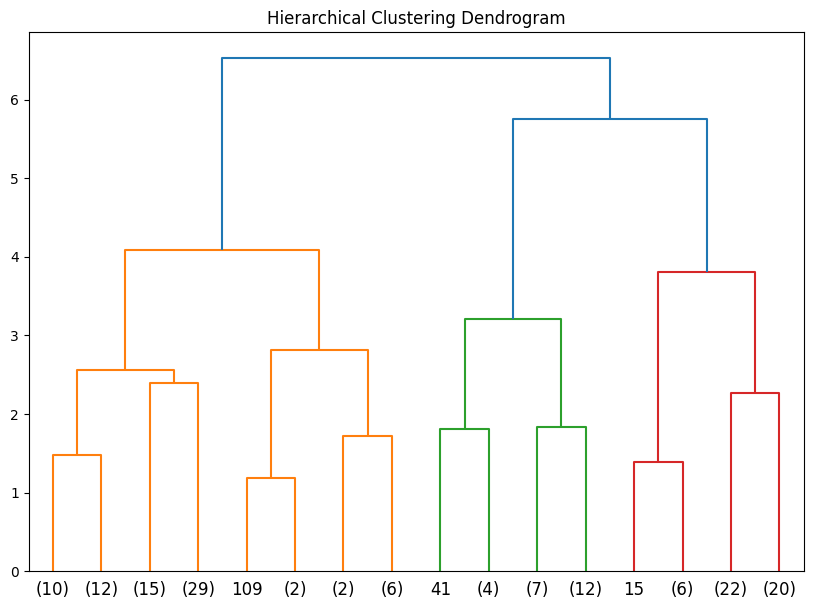

In [ ]:
# Plot Dendrogram
linked = linkage(X_scaled, 'complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

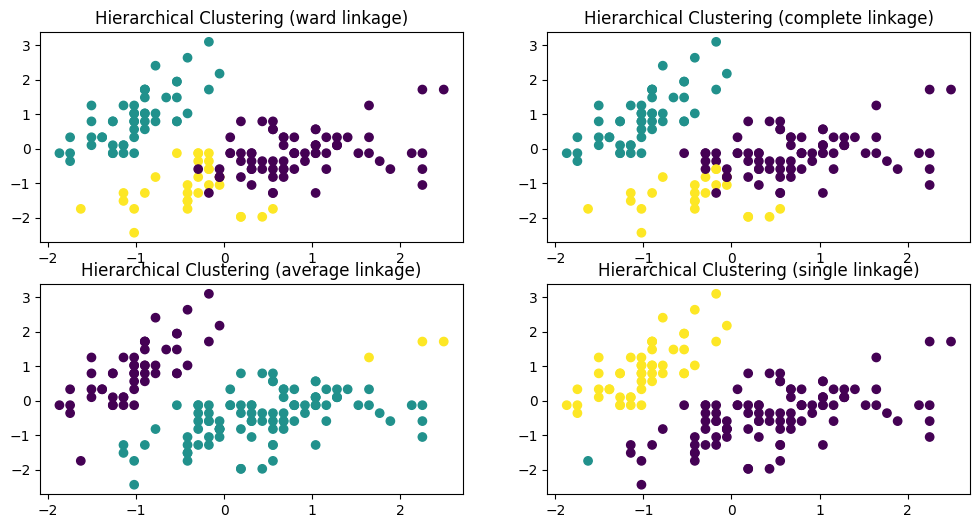

In [ ]:
# Perform Hierarchical Clustering
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, method in enumerate(linkage_methods):
    ac = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_ac = ac.fit_predict(X_scaled)
    axes[i//2, i%2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_ac)
    axes[i//2, i%2].set_title(f'Hierarchical Clustering ({method} linkage)')
plt.show()


#Clustering  in Assignment 3

# Kmeans clustering & viaualization

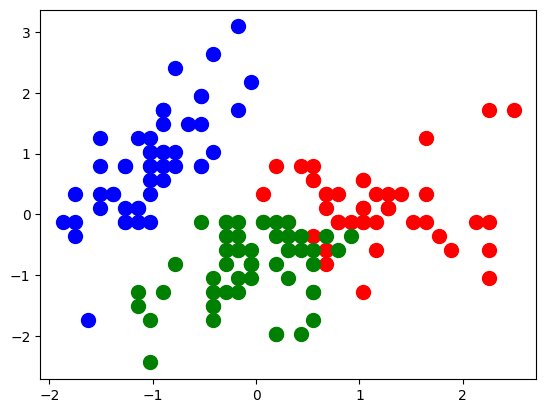

In [23]:
# Kmeans Clusteing and Visualization
kmeans = KMeans(n_clusters=3,init='random',max_iter=300,n_init=10, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=100, c='blue',label='Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0],X_scaled[labels == 1, 1],s=100, c='red',label='Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0],X_scaled[labels == 2, 1], s=100, c='green', label='Iris-virginica')
labels_kmeans = kmeans.labels_


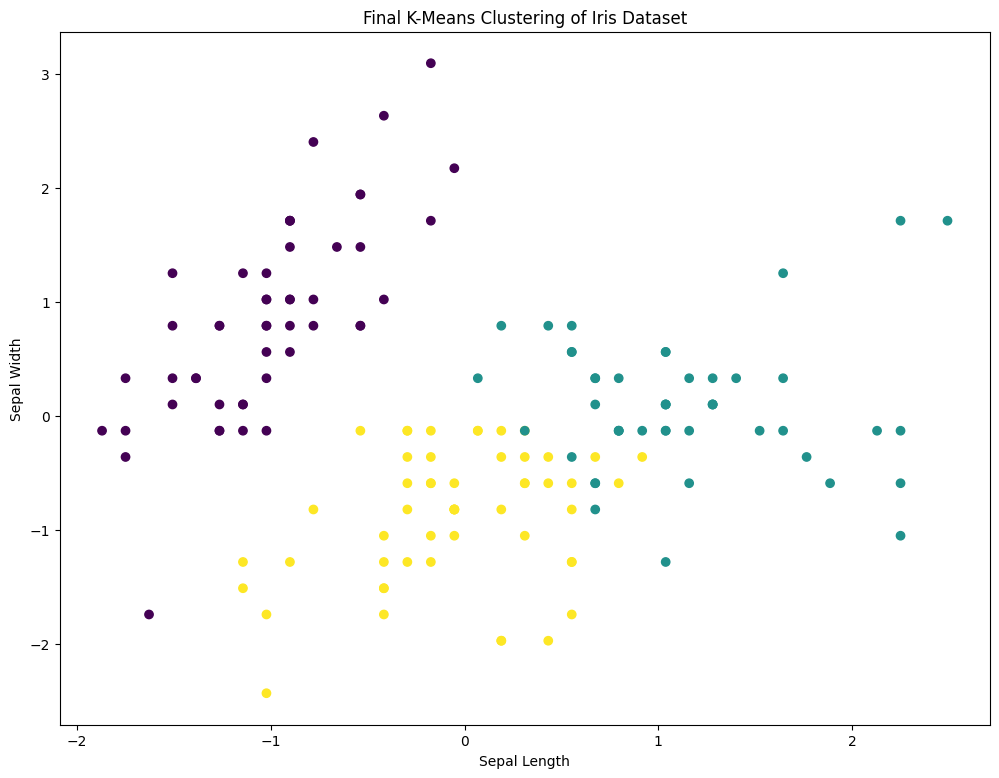

In [24]:
plt.figure(figsize=(12, 9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Final K-Means Clustering of Iris Dataset')
plt.show()



In [25]:
# Save the model
import pickle
filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
# #Later can load the saved model using code below
# loaded_model = pickle.load(open(filename, 'rb'))

#DBscan clustering & visualization

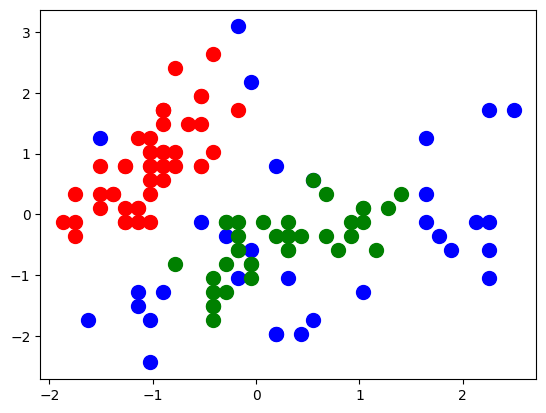

In [26]:
#Through earlier steps we choose eps=0.5. And other parameter selections also mentioned in assignment 2
clusteringDB= DBSCAN(eps=0.4,min_samples=5).fit(X)
labels_dbscan=clusteringDB.labels_
X_scaled= np.array(X_scaled)
plt.scatter(X_scaled[clusteringDB.labels_ == -1, 0], X_scaled[clusteringDB.labels_ == -1, 1],s=100, c='blue',label='Iris-setosa')
plt.scatter(X_scaled[clusteringDB.labels_ == 0, 0], X_scaled[clusteringDB.labels_ == 0, 1],s=100, c='red', label='Iris-versicolour')
plt.scatter(X_scaled[clusteringDB.labels_ == 1, 0], X_scaled[clusteringDB.labels_ == 1, 1],s=100, c='green', label='Iris-virginica')

In [27]:
# Save the model
import pickle
filename = 'DBScan_model.pkl'
pickle.dump(clusteringDB, open(filename, 'wb'))

# AgglomerativeClustering (hierarchical) & viaualization

In [28]:
# AgglomerativeClustering And Visualization
from sklearn.cluster import AgglomerativeClustering

agloCluster = AgglomerativeClustering(n_clusters=3,linkage='complete')
agloCluster.fit(X_scaled)
agloCluster_labels = agloCluster.labels_

# Visualizing first 20 labels..
# labels defines cluster to which data point is assigned to
agloCluster_labels[:20]




array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

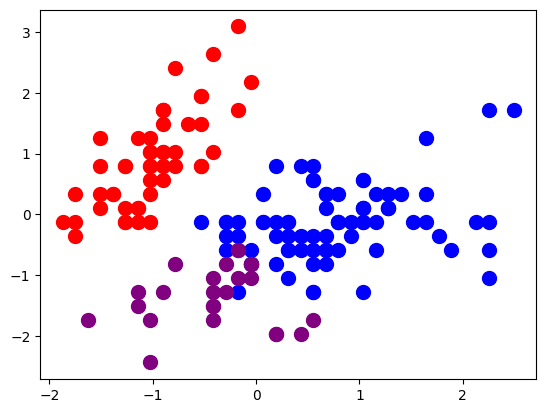

In [ ]:
X_scaled = np.array(X_scaled)
plt.scatter(X_scaled[agloCluster_labels == 0, 0],X_scaled[agloCluster_labels == 0, 1],
            s=100, c='blue',label='Iris-setosa')
plt.scatter(X_scaled[agloCluster_labels == 1, 0], X_scaled[agloCluster_labels == 1, 1],
            s=100, c='red',label='Iris-versicolour')
plt.scatter(X_scaled[agloCluster_labels == 2, 0], X_scaled[agloCluster_labels == 2, 1],
            s=100, c='purple',label='Iris-virginica')

In [29]:
import pickle

# Save the AgglomerativeClustering model
filename = 'agloCluster_model.pkl'
pickle.dump(agloCluster, open(filename, 'wb'))

#Visualization

Kmeans clustering

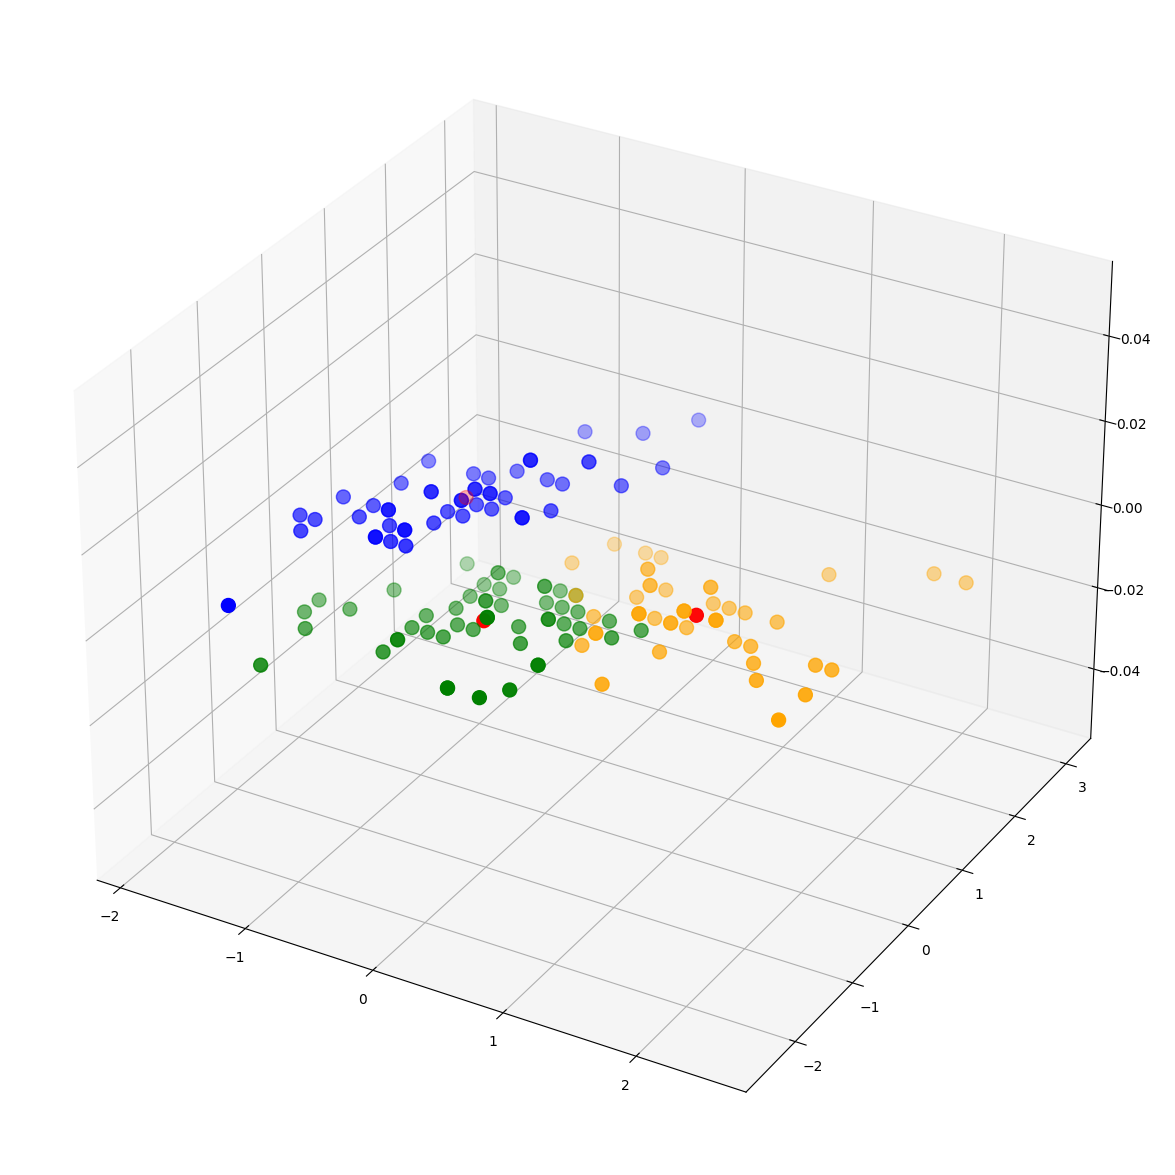

In [ ]:
#3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=100, c='blue', label='Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s=100, c='green', label='Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

DBscan clustering

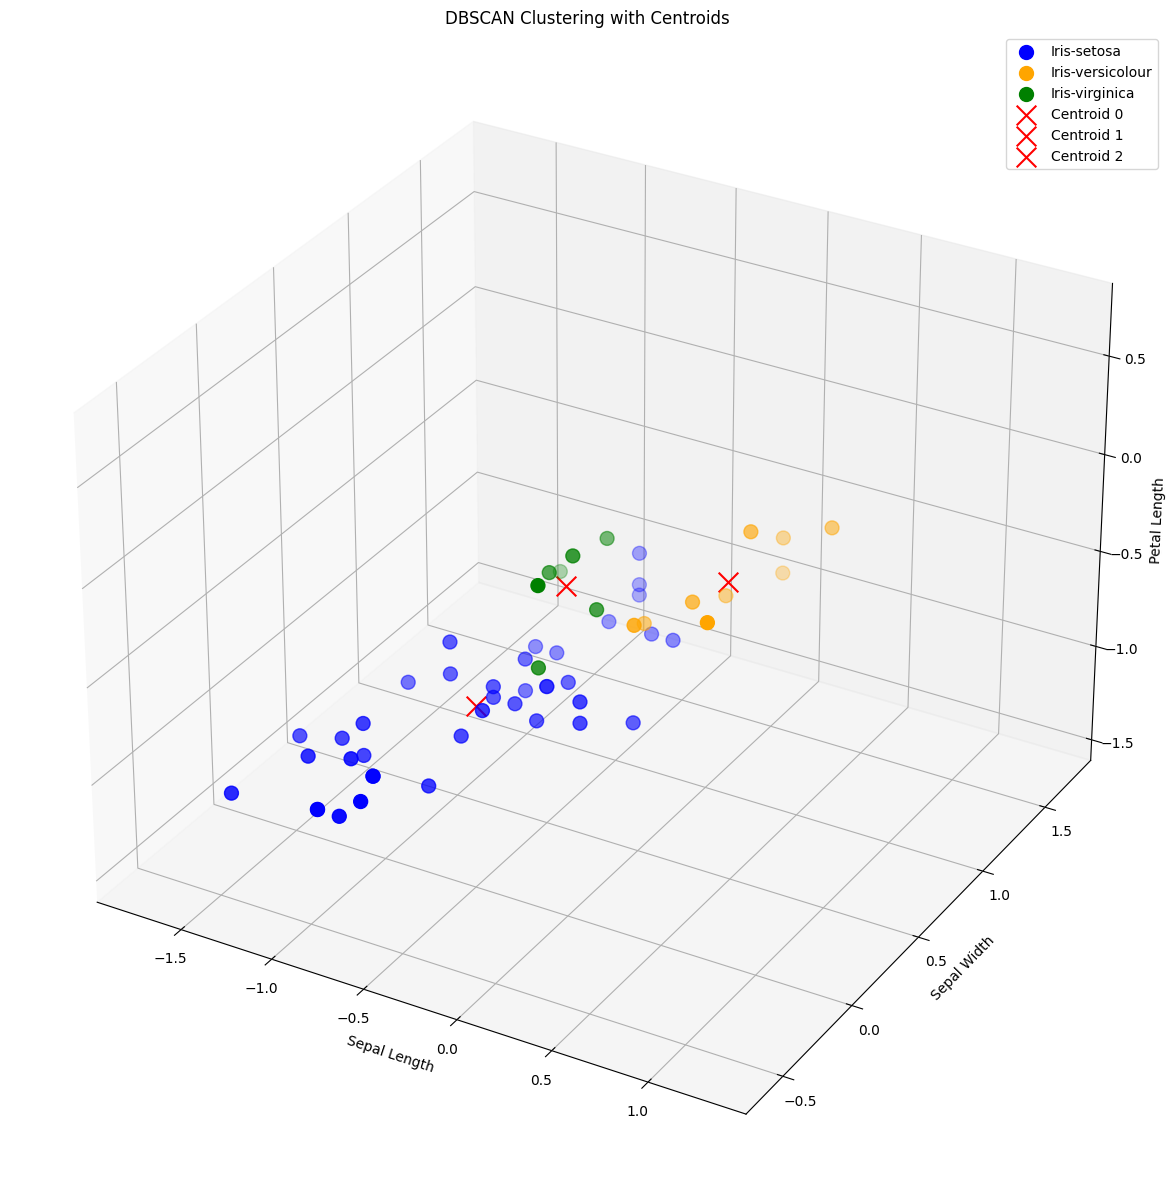

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_scaled[labels_dbscan == 0, 0], X_scaled[labels_dbscan == 0, 1], X_scaled[labels_dbscan == 0, 2], c='blue', s=100, label='Iris-setosa')
ax.scatter(X_scaled[labels_dbscan == 1, 0], X_scaled[labels_dbscan == 1, 1], X_scaled[labels_dbscan == 1, 2], c='orange', s=100, label='Iris-versicolour')
ax.scatter(X_scaled[labels_dbscan == 2, 0], X_scaled[labels_dbscan == 2, 1], X_scaled[labels_dbscan == 2, 2], c='green', s=100, label='Iris-virginica')

# Calculate and plot the centroids
centroids = []
for label in [0, 1, 2]:
    cluster_points = X_scaled[labels_dbscan == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
    ax.scatter(centroid[0], centroid[1], centroid[2], c='red', marker='x', s=200, label=f'Centroid {label}')

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('DBSCAN Clustering with Centroids')
ax.legend()

plt.savefig('dbscan_3d_visualization.png')
plt.show()

Agglomerative Hierarchical clustering

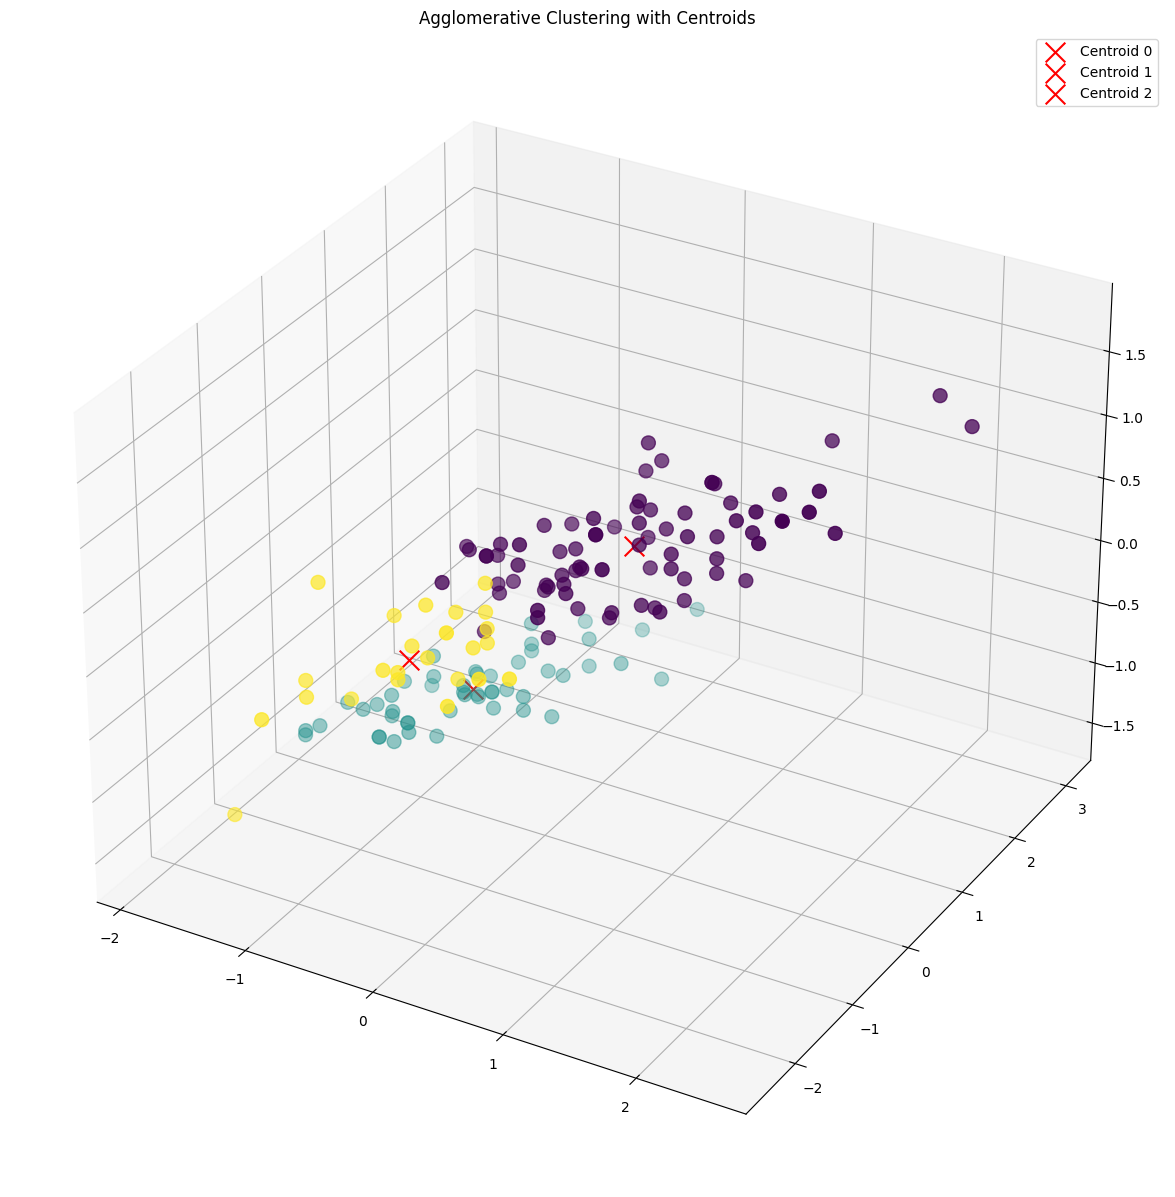

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=agloCluster_labels, s=100)

# Calculate and plot the centroids
centroids = []
for label in np.unique(agloCluster_labels):
    cluster_points = X_scaled[agloCluster_labels == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
    ax.scatter(centroid[0], centroid[1], centroid[2], c='red', marker='x', s=200, label=f'Centroid {label}')

# Set title
ax.set_title('Agglomerative Clustering with Centroids')
ax.legend()

plt.savefig('agglomerative_3d_visualization.png')
plt.show()

#Outlier or outlier detection and discussion


#approach 1

In [30]:

# Outlier or Outlier Detection and discussion
outliers_kmeans = X_scaled[labels == -1]
outliers_ac = X_scaled[agloCluster_labels == -1]
outliers_dbscan = X_scaled[labels_dbscan == -1]

print("Outliers detected:")
print("K-Means:", len(outliers_kmeans))
print("Hierarchical Clustering:", len(outliers_ac))
print("DBSCAN:", len(outliers_dbscan))

Outliers detected:
K-Means: 0
Hierarchical Clustering: 0
DBSCAN: 32


Here 32 outliers identified in DBScan clustering algorithm.

Isolation Forest Outliers:
[ 13  14  15  22  41  60 100 105 106 109 117 118 122 131 135]


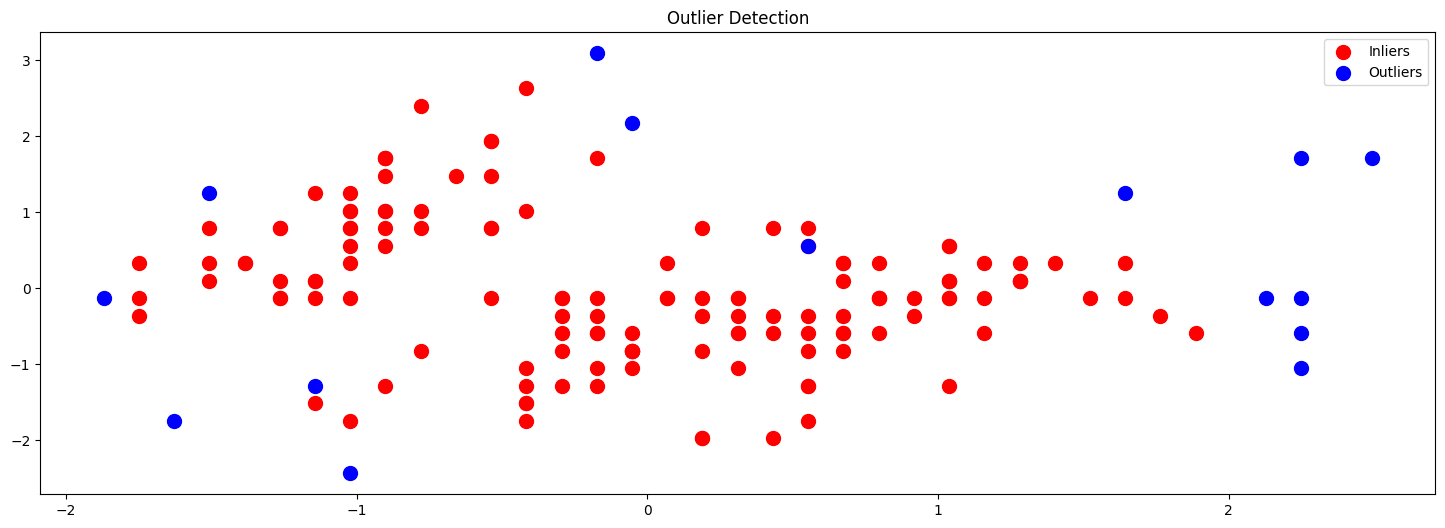

In [32]:
from sklearn.ensemble import IsolationForest

# Outlier Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=0)
outlier_labels_rough = iso_forest.fit_predict(X_scaled)

# Map outliers to a distinct label
outlier_labels_rough = np.where(outlier_labels_rough == -1, 'outlier', 'inlier')

# Print Isolation Forest Outliers
iso_forest_outliers = np.where(outlier_labels_rough == 'outlier')[0]
print("Isolation Forest Outliers:")
print(iso_forest_outliers)

# Visualization
plt.figure(figsize=(18, 6))


# Plot Isolation Forest Outliers
plt.subplot(1,1,1)
plt.scatter(X_scaled[outlier_labels_rough == 'inlier', 0], X_scaled[outlier_labels_rough == 'inlier', 1], s=100, c='red', label='Inliers')
plt.scatter(X_scaled[outlier_labels_rough == 'outlier', 0], X_scaled[outlier_labels_rough == 'outlier', 1], s=100, c='blue', label='Outliers')
plt.title('Outlier Detection')
plt.legend()
plt.show()



In [33]:
# #remove outliers in x_scaled
# X_scaled_without_outliers_x = X_scaled[outlier_labels_rough == -1 ]

In [35]:
from sklearn.ensemble import IsolationForest

# Print outliers for DBSCAN
dbscan_outliers = np.where(labels_dbscan == -1)[0]
print("DBSCAN Outliers:")
print(dbscan_outliers)

# KMeans Outliers (Note: KMeans does not explicitly detect outliers, but we can compare clusters)
# Here we'll assume no explicit outlier detection in KMeans, so print cluster labels

kmeans_outliers = np.where(labels == -1)[0]
print("Kmeans Cluster Outliers:")
print(kmeans_outliers)

print("KMeans Cluster Labels:")
print(labels)

ac_outliers = np.where(agloCluster_labels == -1)[0]
print("Agglomerative Cluster Outliers:")
print(ac_outliers)

# Print Agglomerative Clustering labels
print("Agglomerative Clustering Labels:")
print(agloCluster_labels)



DBSCAN Outliers:
[ 14  15  22  41  57  60  62  64  68  79  84  85  87  93  98 100 105 106
 107 108 109 114 117 118 119 122 125 129 130 131 134 135]
Kmeans Cluster Outliers:
[]
KMeans Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
Agglomerative Cluster Outliers:
[]
Agglomerative Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 0 0 0 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



Handling DBSCAN outliers:


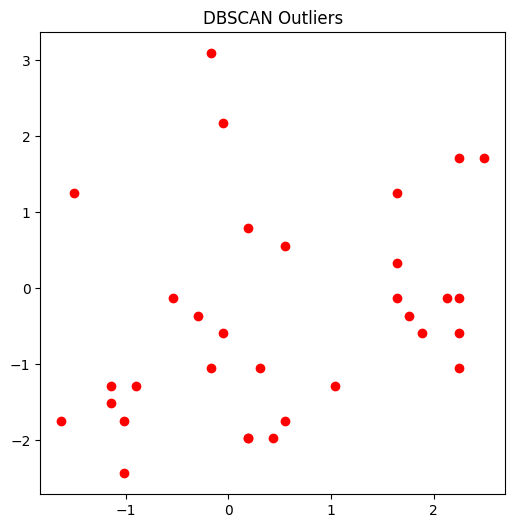


DBSCAN Outliers (as a vector):
[ 14  15  22  41  57  60  62  64  68  79  84  85  87  93  98 100 105 106
 107 108 109 114 117 118 119 122 125 129 130 131 134 135]

DBSCAN Outliers data:
[[-0.05250608  2.16998818 -1.45390138 -1.3154443 ]
 [-0.17367395  3.09077525 -1.2833891  -1.05217993]
 [-1.50652052  1.24920112 -1.56757623 -1.3154443 ]
 [-1.62768839 -1.74335684 -1.39706395 -1.18381211]
 [-1.14301691 -1.51316008 -0.26031542 -0.26238682]
 [-1.02184904 -2.43394714 -0.14664056 -0.26238682]
 [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
 [-0.29484182 -0.36217625 -0.08980313  0.13250973]
 [ 0.4321654  -1.97355361  0.42173371  0.3957741 ]
 [-0.17367395 -1.05276654 -0.14664056 -0.26238682]
 [-0.53717756 -0.13197948  0.42173371  0.3957741 ]
 [ 0.18982966  0.78880759  0.42173371  0.52740629]
 [ 0.55333328 -1.74335684  0.36489628  0.13250973]
 [-1.02184904 -1.74335684 -0.26031542 -0.26238682]
 [-0.90068117 -1.28296331 -0.4308277  -0.13075464]
 [ 0.55333328  0.55861082  1.27429511  1.71209594

In [ ]:
# Handle outliers detected by DBSCAN
if len(outliers_dbscan) > 0:
    print("\nHandling DBSCAN outliers:")
    #Analyze outliers separately
    plt.figure(figsize=(6, 6))
    plt.scatter(outliers_dbscan[:, 0], outliers_dbscan[:, 1], c='r')
    plt.title("DBSCAN Outliers")
    plt.show()

    # Display the DBSCAN outliers in a vector
    print("\nDBSCAN Outliers (as a vector):")
    print(dbscan_outliers)

    # Display the DBSCAN outliers in a table
    print("\nDBSCAN Outliers data:")
    print(X_scaled[dbscan_outliers])
    # Investigate and understand the outliers & Incorporate domain knowledge to evaluate the outliers

else:
    print("No outliers detected by DBSCAN.")

Handling outliers

In [36]:
# Replace outliers with the mean
X_scaled_no_outliers = X_scaled.copy()
X_scaled_no_outliers[dbscan_outliers, :] = X_scaled.mean(axis=0)
from sklearn.cluster import DBSCAN


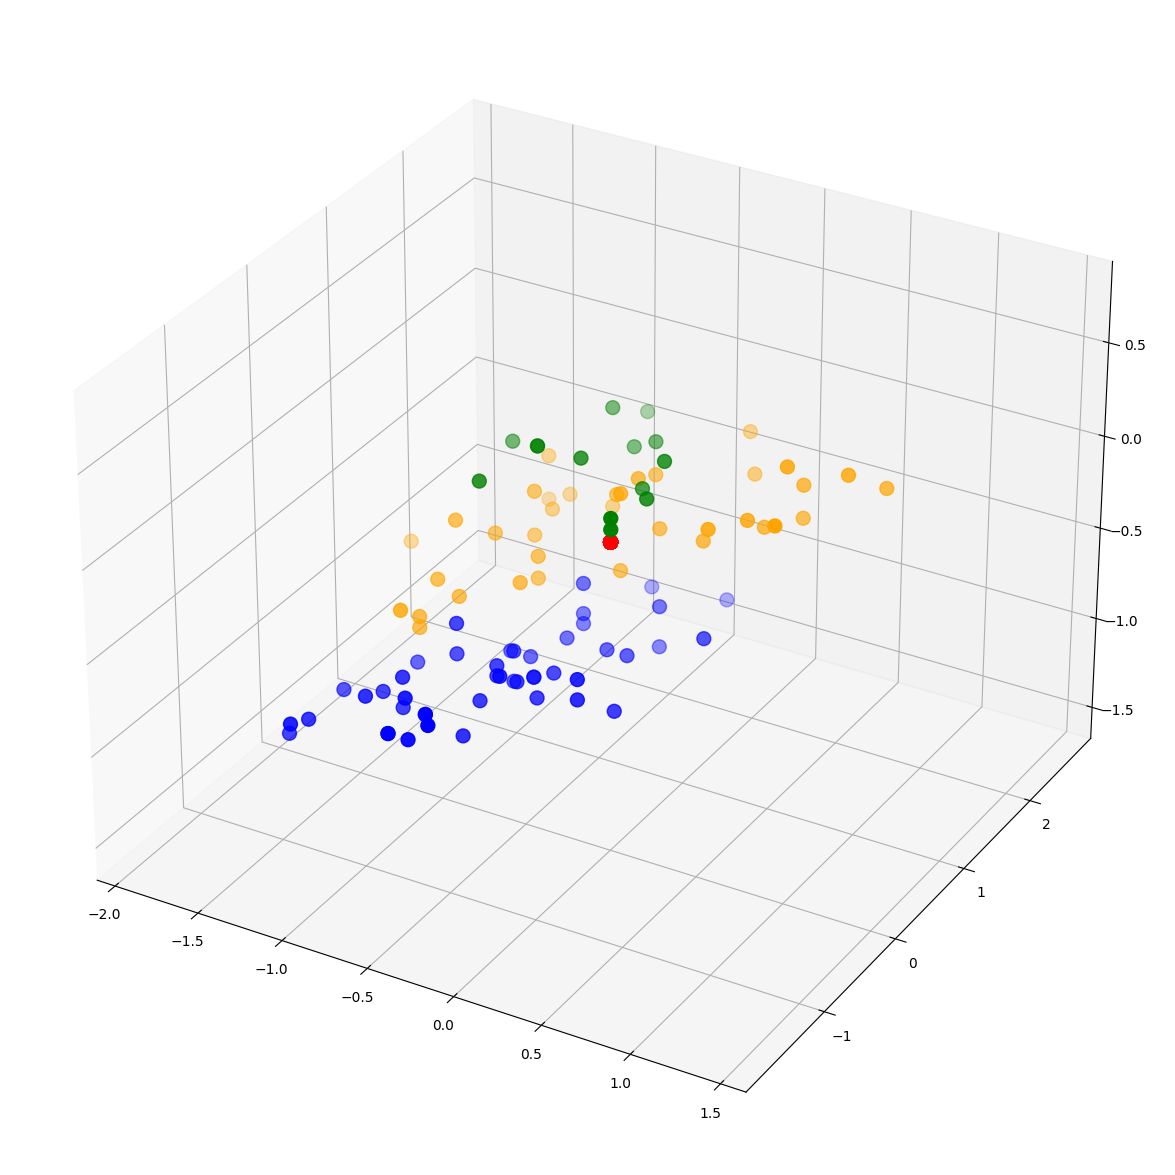

In [ ]:

# Create a 3D figure after replacing all the outliers with mean
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points and look for outliers in red points
ax.scatter(X_scaled_no_outliers[labels_dbscan == -1, 0], X_scaled_no_outliers[labels_dbscan == -1, 1], X_scaled_no_outliers[labels_dbscan == -1, 2], s=100, c='red', label='Outliers')
ax.scatter(X_scaled_no_outliers[labels_dbscan == 0, 0], X_scaled_no_outliers[labels_dbscan == 0, 1], X_scaled_no_outliers[labels_dbscan == 0, 2], c='blue', s=100)
ax.scatter(X_scaled_no_outliers[labels_dbscan == 1, 0], X_scaled_no_outliers[labels_dbscan == 1, 1], X_scaled_no_outliers[labels_dbscan == 1, 2], c='orange', s=100)
ax.scatter(X_scaled_no_outliers[labels_dbscan == 2, 0], X_scaled_no_outliers[labels_dbscan == 2, 1], X_scaled_no_outliers[labels_dbscan == 2, 2], c='green', s=100)




In [37]:

# now, there is an outlier . we can remove it.
# As one outlier not gonna affect much in this case. we can also leave it
dbscan2 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan2 = dbscan2.fit_predict(X_scaled_no_outliers)


In [38]:
# Save the model
import pickle
filename = 'DBScan2_model.pkl'
pickle.dump(dbscan2, open(filename, 'wb'))

In [39]:
#if i need to remove the red oulier
# Remove the outlier data points from X_scaled_no_outliers
#X_scaled_no_outliers2 = np.delete(X_scaled_no_outliers, labels_dbscan == -1, axis=0)

# Remove the outliers
X_scaled_no_outliers2 = X_scaled_no_outliers[labels_dbscan != -1]

In [40]:
dbscan3 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan3 = dbscan3.fit_predict(X_scaled_no_outliers2)

# # Save the model
import pickle
filename = 'DBScan3_model.pkl'
pickle.dump(dbscan3, open(filename, 'wb'))

#Now the outliers are detected and the model is improved

3 clustering machine learning algorithms were used and three models were built initially.

kmeans

clusteringDB

agloCluster

Here the clusteringDB model using DBScan algoritham had 32 outliers, Other two had 0 outliers.

So at first, all the outliers were replaced by mean value. Here in dbscan2 model again one outlier was found. So that one outlier was removed. Finally dbscan3 model was fit


#Approach2

other rough outlier handlings: remove all the outliers :: not want to apply here as it not seems efficient to remove 32 outliers


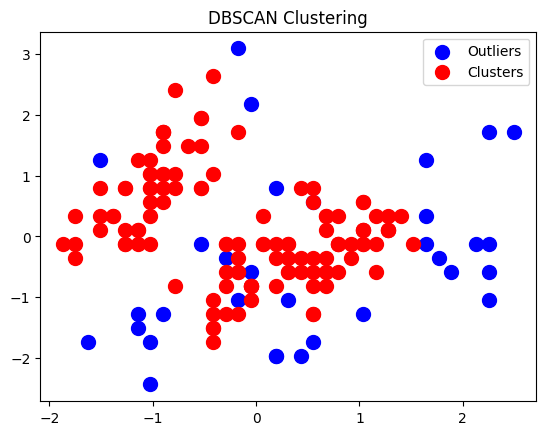

In [ ]:
# Plot DBSCAN

plt.scatter(X_scaled[labels_dbscan == -1, 0], X_scaled[labels_dbscan == -1, 1], s=100, c='blue', label='Outliers')
plt.scatter(X_scaled[labels_dbscan != -1, 0], X_scaled[labels_dbscan != -1, 1], s=100, c='red', label='Clusters')
plt.title('DBSCAN Clustering')
plt.legend()

Clustering without outliers:


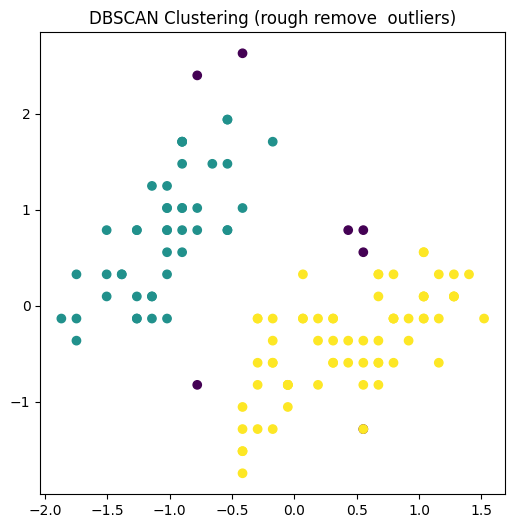

In [ ]:
# Handle outliers
# Can choose to remove the outliers

X_scaled_without_outliers = X_scaled[labels_dbscan != -1]
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_without_outliers = dbscan.fit_predict(X_scaled_without_outliers)
print("Clustering without outliers:")
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled_without_outliers[:, 0], X_scaled_without_outliers[:, 1], c=labels_dbscan_without_outliers)
plt.title("DBSCAN Clustering (rough remove  outliers)")
plt.show()


#Here removing out liers seems inefficient. Thats why we earlier go for approach1

3 clustering machine learning algorithms were used and three models were built initially.

kmeans

clusteringDB

agloCluster

Here the clusteringDB model using DBScan algoritham had 32 outliers, Other two had 0 outliers.

So at first, all the outliers were replaced by mean value. Here in dbscan2 model again one outlier was found. So that one outlier was removed. Finally dbscan3 model was fit


##Assignment 4

##Evaluate the models before removing outliers

kmeans

agloCluster (hierarchical)

clusteringDB



In [ ]:
# Evaluation of clustering performance
print("Silhouette Score:")
print(f"K-Means: {silhouette_score(X_scaled, labels_kmeans):.3f}")
print(f"Hierarchical Agglomerative Clustering: {silhouette_score(X_scaled, agloCluster_labels):.3f}")
print(f"DBSCAN: {silhouette_score(X_scaled, labels_dbscan):.3f}")

print("\nCalinski-Harabasz Index:")
print(f"K-Means: {calinski_harabasz_score(X_scaled, labels_kmeans):.3f}")
print(f"Hierarchical Clustering: {calinski_harabasz_score(X_scaled, agloCluster_labels):.3f}")
print(f"DBSCAN: {calinski_harabasz_score(X_scaled, labels_dbscan):.3f}")

print("\nDavies-Bouldin Index:")
print(f"K-Means: {davies_bouldin_score(X_scaled, labels_kmeans):.3f}")
print(f"Hierarchical Clustering: {davies_bouldin_score(X_scaled, agloCluster_labels):.3f}")
print(f"DBSCAN: {davies_bouldin_score(X_scaled, labels_dbscan):.3f}")


Silhouette Score:
K-Means: 0.460
Hierarchical Clustering: 0.450
DBSCAN: 0.207

Calinski-Harabasz Index:
K-Means: 241.904
Hierarchical Clustering: 213.082
DBSCAN: 57.452

Davies-Bouldin Index:
K-Means: 0.834
Hierarchical Clustering: 0.758
DBSCAN: 4.377


Based on the evaluation metrics you provided bfore removing outliers

1. **Silhouette Score**:
   - K-Means: 0.460
   - Hierarchical Clustering: 0.450
   - DBSCAN: 0.207

   The Silhouette Score measures the quality of the clustering, with values ranging from -1 to 1. A higher value indicates better-defined clusters.
   - K-Means and Hierarchical Clustering have relatively similar and moderately high Silhouette Scores, indicating reasonably well-defined clusters.
   - DBSCAN has a much lower Silhouette Score of 0.207, suggesting that the clusters formed by DBSCAN are not as well-defined as those formed by K-Means and Hierarchical Clustering.

2. **Calinski-Harabasz Index**:
   - K-Means: 241.904
   - Hierarchical Clustering: 213.082
   - DBSCAN: 57.452

   The Calinski-Harabasz Index measures the ratio of the between-cluster variance and the within-cluster variance. A higher value indicates better-defined clusters.
   - K-Means has the highest Calinski-Harabasz Index, suggesting it has the best-defined clusters among the three methods.
   - Hierarchical Clustering has a lower Calinski-Harabasz Index than K-Means, but still higher than DBSCAN, indicating its clusters are reasonably well-defined.
   - DBSCAN has a much lower Calinski-Harabasz Index, indicating its clusters are the least well-defined of the three methods.

3. **Davies-Bouldin Index**:
   - K-Means: 0.834
   - Hierarchical Clustering: 0.758
   - DBSCAN: 4.377

   The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. A lower value indicates better-defined clusters.
   - Hierarchical Clustering has the lowest Davies-Bouldin Index, suggesting it has the best-defined clusters among the three methods.
   - K-Means has a slightly higher Davies-Bouldin Index than Hierarchical Clustering, but still relatively low, indicating its clusters are also well-defined.
   - DBSCAN has a much higher Davies-Bouldin Index, suggesting its clusters are the least well-defined of the three methods.

In summary,
**the evaluation metrics suggest that K-Means and Hierarchical Clustering perform better than DBSCAN in terms of cluster quality and definition. K-Means appears to have a slight edge over Hierarchical Clustering based on the Calinski-Harabasz Index, while Hierarchical Clustering performs slightly better based on the Davies-Bouldin Index.**
 DBSCAN consistently scores lower than the other two methods across all three evaluation metrics, indicating it is the least effective clustering algorithm for this particular dataset.A good clustering algorithm should be able to achieve high Silhouette Scores, high Calinski-Harabasz Indices, and low Davies-Bouldin Indices, as these metrics indicate that the algorithm has successfully identified the natural cluster structure present in the Iris dataset.

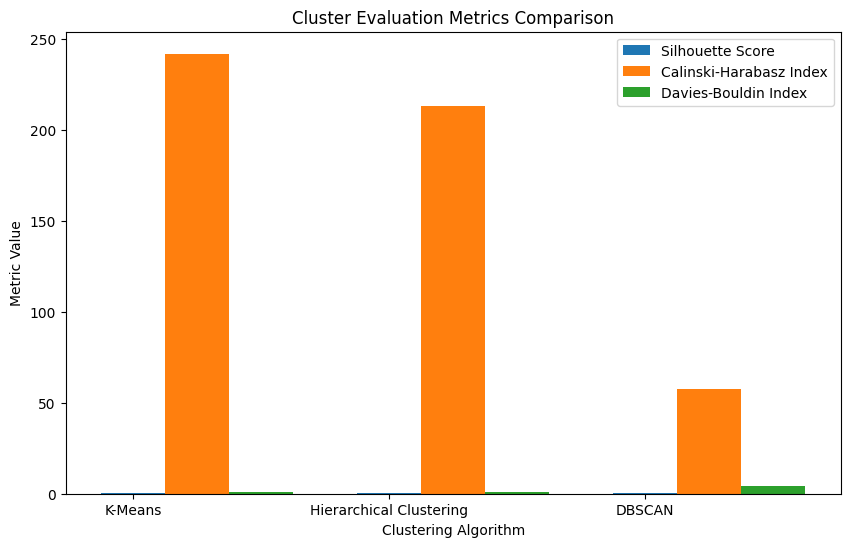

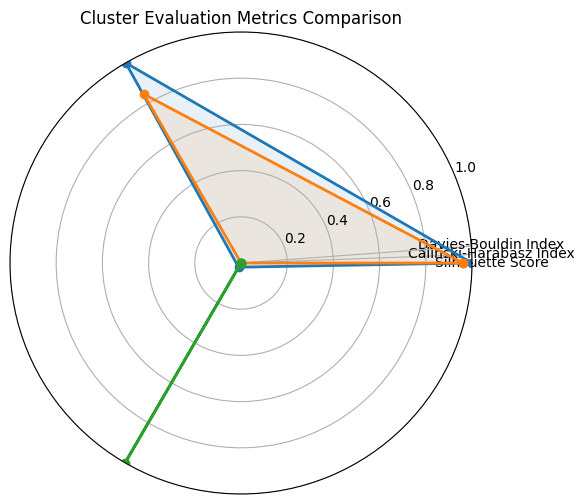

In [ ]:
# Silhouette Score:
# K-Means: 0.460
# Hierarchical Clustering: 0.450
# DBSCAN: 0.207

# Calinski-Harabasz Index:
# K-Means: 241.904
# Hierarchical Clustering: 213.082
# DBSCAN: 57.452

# Davies-Bouldin Index:
# K-Means: 0.834
# Hierarchical Clustering: 0.758
# DBSCAN: 4.377

import matplotlib.pyplot as plt

# Data
cluster_metrics = {
    'Algorithm': ['K-Means', 'Hierarchical Clustering', 'DBSCAN'],
    'Silhouette Score': [0.460, 0.450, 0.207],
    'Calinski-Harabasz Index': [241.904, 213.082, 57.452],
    'Davies-Bouldin Index': [0.834, 0.758, 4.377]
}

# Bar chart
num_algs = len(cluster_metrics['Algorithm'])
x = range(num_algs)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, cluster_metrics['Silhouette Score'], width, label='Silhouette Score')
ax.bar([i + width for i in x], cluster_metrics['Calinski-Harabasz Index'], width, label='Calinski-Harabasz Index')
ax.bar([i + 2*width for i in x], cluster_metrics['Davies-Bouldin Index'], width, label='Davies-Bouldin Index')

ax.set_xticks(x)
ax.set_xticklabels(cluster_metrics['Algorithm'])
ax.set_xlabel('Clustering Algorithm')
ax.set_ylabel('Metric Value')
ax.legend()
ax.set_title('Cluster Evaluation Metrics Comparison')
plt.show()

# Radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Normalize the metrics to a common scale
normalized_metrics = {}
for metric, values in cluster_metrics.items():
    if metric != 'Algorithm':
        normalized_metrics[metric] = [(value - min(values)) / (max(values) - min(values)) for value in values]

angles = [i / float(len(normalized_metrics)) * 2 * 3.14 for i in range(len(normalized_metrics))]
angles += angles[:1]  # Repeat the first angle to close the circle

ax.plot(angles, list(normalized_metrics.values()) + [normalized_metrics[list(normalized_metrics.keys())[0]]], 'o-', linewidth=2)
ax.fill(angles, list(normalized_metrics.values()) + [normalized_metrics[list(normalized_metrics.keys())[0]]], alpha=0.1)
ax.set_thetagrids(angles[:-1], list(normalized_metrics.keys()))
ax.set_title('Cluster Evaluation Metrics Comparison')
ax.set_ylim(0, 1)
plt.show()

In [41]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

# K-Means Clustering
nmi_kmeans = normalized_mutual_info_score(y, labels)
ari_kmeans = adjusted_rand_score(y, labels)
print(f"KMeans NMI Score: {nmi_kmeans:.3f}")
print(f"KMeans ARI Score: {ari_kmeans:.3f}")

# DBSCAN Clustering
nmi_dbscan = normalized_mutual_info_score(y, labels_dbscan)
ari_dbscan = adjusted_rand_score(y, labels_dbscan)
print(f"DBSCAN NMI Score: {nmi_dbscan:.3f}")
print(f"DBSCAN ARI Score: {ari_dbscan:.3f}")

# Agglomerative Clustering
nmi_agg = normalized_mutual_info_score(y, agloCluster_labels)
ari_agg = adjusted_rand_score(y, agloCluster_labels)
print(f"Agglomerative Clustering NMI Score: {nmi_agg:.3f}")
print(f"Agglomerative Clustering ARI Score: {ari_agg:.3f}")




KMeans NMI Score: 0.659
KMeans ARI Score: 0.620
DBSCAN NMI Score: 0.641
DBSCAN ARI Score: 0.590
Agglomerative Clustering NMI Score: 0.653
Agglomerative Clustering ARI Score: 0.573


**Kmeans clustering perform better than others.**
Agglomerative Clustering performs next to kmeans

##After removing outliers for clusteringDB (DB Scan)

In [ ]:
# Evaluation of clustering performance
print("Silhouette Score:")
print(f"DBSCAN: {silhouette_score(X_scaled_no_outliers2, labels_dbscan3):.3f}")

print("\nCalinski-Harabasz Index:")
print(f"DBSCAN: {calinski_harabasz_score(X_scaled_no_outliers2, labels_dbscan3):.3f}")

print("\nDavies-Bouldin Index:")
print(f"DBSCAN: {davies_bouldin_score(X_scaled_no_outliers2, labels_dbscan3):.3f}")


Silhouette Score:
DBSCAN: 0.535

Calinski-Harabasz Index:
DBSCAN: 173.269

Davies-Bouldin Index:
DBSCAN: 0.452


To analyze and compare the clustering performance of different algorithms on the Iris dataset, let's look at the three evaluation metrics:

### 1. **Silhouette Score**
The Silhouette Score measures how similar each point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

- **K-Means: 0.460**
- **Hierarchical Clustering: 0.450**
- **DBSCAN: 0.207** earlier
- **DBSCAN: 0.535** after outlier detection and improvision


**Analysis:**
- **DBSCAN** has the highest Silhouette Score (0.535), suggesting that it produces the most well-separated and coherent clusters than before. Earlier it had o.207. But by handling outliers the score is improved. This implies that, for the Iris dataset, DBSCAN's clusters are more compact and better-separated from each otherafter outlier handling
- **K-Means** and **Hierarchical Clustering** have similar scores (0.460 and 0.450, respectively). Both methods perform reasonably well, higher score in initial data set indicates better clustering quality in terms of distance between points within and between clusters.

### 2. **Calinski-Harabasz Index (Variance Ratio Criterion)**
The Calinski-Harabasz Index measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values suggest that clusters are well-separated and compact.

- **K-Means: 241.904**
- **Hierarchical Clustering: 213.082**
- **DBSCAN: 57.452** Earlier
- **DBSCAN: 173.269** After oullier handling

**Analysis:**
- **K-Means** has the highest Calinski-Harabasz Index (241.904), indicating that K-Means clustering results in more distinct and compact clusters compared to the other algorithms. It suggests that, in terms of variance, K-Means is the most effective at separating clusters.
- **Hierarchical Clustering** comes next (213.082), indicating good cluster separation but slightly less effective than K-Means.
- **DBSCAN** has the lowest score (173.269), suggesting that the clusters found by DBSCAN are less compact or more dispersed. This is consistent with DBSCAN's tendency to form clusters of varying shapes and sizes, sometimes including noise points.

### 3. **Davies-Bouldin Index**
The Davies-Bouldin Index evaluates the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering results with more distinct clusters.

- **K-Means: 0.834**
- **Hierarchical Clustering: 0.758**
- **DBSCAN: 4.377** Initially
- **DBSCAN: 0.452** After outlier handling

**Analysis:**
- **DBSCAN** has the lowest Davies-Bouldin Index (0.452) after handling the outliers, which suggests that it produces clusters that are more distinct and have smaller average similarity to other clusters. This aligns with the higher Silhouette Score, reinforcing that DBSCAN achieves better-defined clusters.
- **Hierarchical Clustering** has a lower Davies-Bouldin Index (0.758) than K-Means, indicating that its clusters are somewhat better separated than those produced by K-Means.
- **K-Means** has the highest Davies-Bouldin Index (0.834), suggesting that the clusters produced by K-Means are less distinct compared to those produced by Hierarchical Clustering.

### **Summary of Findings:**
- **DBSCAN** performs the best in the dataset after the outliers handling than initial approach according to the Silhouette Score and Davies-Bouldin Index, indicating it produces the most well-separated and well-defined clusters. However, its Calinski-Harabasz Index is the lowest, which might suggest variability in cluster sizes or noise.
- **K-Means** has the highest Calinski-Harabasz Index, showing that its clusters are compact and well-separated in terms of variance. However, it has the highest Davies-Bouldin Index, indicating less distinct clusters compared to Hierarchical Clustering.
- **Hierarchical Clustering** falls in between K-Means and initial DBSCAN approach across all metrics, performing reasonably well but not as strong as K-Means in compactness.



Based on the cluster evaluation metrics:

DBSCAN appears to be the best clustering algorithm for your dataset, as it has the highest Silhouette Score and the lowest Davies-Bouldin Index, indicating the most well-separated and compact clusters.It effectively identifies the natural clusters in the data, with well-separated and compact clusters.
Although K-Means has the highest Calinski-Harabasz Index, suggesting the best overall cluster structure, the Silhouette Score and Davies-Bouldin Index for DBSCAN are superior, making DBSCAN the preferred choice.
Hierarchical Clustering performs the worst across all three metrics, so it would not be the recommended algorithm for your dataset.


**In contrast, DBSCAN may not be the best choice for the Iris dataset for the following reasons:**

Cluster Shapes: DBSCAN can handle arbitrary cluster shapes, but the Iris dataset has well-defined, spherical clusters, which favors the K-Means approach.

Known Number of Clusters: DBSCAN can automatically determine the number of clusters, but since the Iris dataset has a known number of classes (3), this advantage of DBSCAN is less relevant.

Density-based Clustering: DBSCAN is a density-based clustering algorithm, which may not be as well-suited for the Iris dataset, as the clusters are not necessarily defined by density differences.

Sensitivity to Parameters: DBSCAN requires the selection of two parameters (epsilon and minimum samples) that can significantly impact the clustering results, which adds complexity compared to the simpler K-Means algorithm.

## So the kmeans model is suitable for this iris data set
**WithThe HIGHEST Calinski-Harabasz Index**

**K-Means has the highest Calinski-Harabasz Index (241.904), indicating that K-Means clustering results in more distinct and compact clusters compared to the other algorithms. It suggests that, in terms of variance, K-Means is the most effective at separating clusters.**

Based on Calinski-Harabasz Index:

The Calinski-Harabasz Index is a relative metric, and its ideal value depends on the specific dataset and clustering problem.
For the Iris dataset, a Calinski-Harabasz Index above 200 is generally considered good, indicating well-separated clusters.
An index value above 500 would be considered excellent, indicating very well-separated clusters.
Based on this, Kmeans and Agglomerative Clustering seems to be good.

Davies-Bouldin Index:
The Davies-Bouldin Index ranges from 0 to ∞, with lower values indicating better-defined clusters.
For the Iris dataset, a Davies-Bouldin Index below 1 is generally considered good, indicating well-separated clusters.
An index value below 0.5 would be considered excellent, indicating very well-separated clusters.
ALL three clustering algorithms have values below 1. Seems good.



###"**Further, we can try to improve the model performance using various preprocessing techniques, dimensionality reduction methods, ensemble methods, and by applying regularization and optimization techniques. Additionaly can consider employing neural networks related approach also**"

# Refer ImprovisedIrisClustering.ipynb

Thecode performs clustering, but it does so in a more sophisticated manner than just applying a clustering algorithm directly to the data.

### Clustering Steps in the Code provided in the pdf ImprovisedIrisClustering

1. **Dimensionality Reduction with Autoencoder:**
   - **Purpose:** Before clustering, the code uses an autoencoder to learn a lower-dimensional representation of the data. This step transforms the data into a new feature space where clustering can be more effective.
   - **Process:** The autoencoder compresses the input data into a smaller latent space (encoding) and then reconstructs the original data from this encoding. The encoding layer represents the reduced-dimension features used for clustering.

2. **Similarity Matrix Calculation:**
   - **Cosine Similarity:** The code computes the cosine similarity between data points and constructs a similarity matrix. This matrix captures the pairwise relationships between data points based on their similarity.

   - **Laplacian Matrix:** The Laplacian matrix is derived from the similarity matrix. It is a graph-based representation used in spectral clustering to identify clusters based on the structure of the graph.

3. **Clustering with KMeans:**
   - **On Encoded Data:** After dimensionality reduction with the autoencoder, KMeans clustering is applied to the encoded (reduced-dimension) data. This step groups the data points based on their similarity in the reduced feature space.

   - **On Original Data:** For comparison, KMeans clustering is also applied directly to the original Iris data. This helps in evaluating how well the autoencoder-based clustering performs compared to clustering on the original data.

4. **Evaluation:**
   - **Normalized Mutual Information (NMI):** The code computes the NMI score to evaluate the clustering results. NMI measures how well the clustering matches the true labels, providing a quantitative assessment of clustering quality.

### Summary

While the core clustering algorithm used is **KMeans**, the process is enhanced by:
- **Dimensionality Reduction:** Using an autoencoder to transform the data into a more manageable form for clustering.
- **Similarity and Laplacian Matrices:** Incorporating graph-based methods to better understand data structure.

In conclusion, the code involves clustering but integrates additional steps like dimensionality reduction and graph-based analysis to potentially improve the quality and effectiveness of the clustering results.

#code

In [ ]:
# # Import necessary libraries
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings
# import math
# from sklearn import datasets
# from sklearn.preprocessing import normalize
# from scipy.spatial.distance import squareform, pdist
# from scipy.cluster.vq import kmeans, vq
# from sklearn.metrics import normalized_mutual_info_score
# from tensorflow.keras.layers import Dense, BatchNormalization, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Suppress warnings
# warnings.filterwarnings('ignore')

# # Fetch the Iris dataset
# iris = datasets.load_iris()
# data = iris.data
# labels = iris.target

# # Standardize the data
# X = normalize(data, axis=0)

# # Compute cosine similarity matrix
# X_cosine = pdist(X, 'cosine')
# X_cosine = squareform(X_cosine)

# # Compute Laplacian matrix
# S = np.sum(X_cosine, axis=0)
# D = np.diag(S)
# D_inv = np.linalg.inv(D)
# L = np.dot(D_inv, X_cosine)

# # Normalize the Laplacian matrix
# def normalization(V):
#     return (V - min(V)) / (max(V) - min(V))

# L_normalized = np.apply_along_axis(normalization, 1, L)

# # Initialize SimilarityDatasetIterator
# class SimilarityDatasetIterator:
#     def _init_(self, data, labels, similarity_matrix):
#         self.data = data
#         self.labels = labels
#         self.matrix = similarity_matrix
#         self.data_size = self.matrix.shape[0]
#         self.current_index = 0

#     def next_batch(self, num):
#         data = self.matrix.T
#         labels = self.labels
#         idx = np.arange(len(data))
#         np.random.shuffle(idx)
#         idx = idx[:num]
#         data_shuffle = [data[i] for i in idx]
#         labels_shuffle = [labels[i] for i in idx]
#         return data_shuffle, labels_shuffle

#     def whole_dataset(self):
#         return self.matrix.T, self.labels

# trainSet_cosine = SimilarityDatasetIterator(data, labels, L_normalized)

# n_input = trainSet_cosine.data_size

# # Define network sizes
# if n_input >= 256:
#     Nn = 512
# elif n_input >= 128:
#     Nn = 256

# n_hidden_1 = Nn // 2
# n_hidden_2 = n_hidden_1 // 2
# n_hidden_3 = n_hidden_2 // 2
# n_hidden_4 = n_hidden_3 // 2
# n_code = 2

# print('Layer 1: ', n_input)
# print('Layer 2: ', n_hidden_1)
# print('Layer 3: ', n_hidden_2)
# print('Layer 4: ', n_hidden_3)
# print('Layer 5: ', n_code)

# # Build autoencoder model
# inputs = Input(shape=(n_input,))
# x = Dense(n_hidden_1, activation='relu')(inputs)
# x = BatchNormalization()(x)
# x = Dense(n_hidden_2, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(n_hidden_3, activation='relu')(x)
# x = BatchNormalization()(x)
# code = Dense(n_code, activation='linear')(x)

# x = Dense(n_hidden_3, activation='relu')(code)
# x = BatchNormalization()(x)
# x = Dense(n_hidden_2, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(n_hidden_1, activation='relu')(x)
# x = BatchNormalization()(x)
# outputs = Dense(n_input, activation='sigmoid')(x)

# autoencoder = Model(inputs, outputs)
# autoencoder.compile(optimizer=Adam(), loss='mse')

# # Training parameters
# n_layers = 5
# learning_rate = 0.9 / n_input
# n_batch = math.ceil(n_input / n_layers)
# n_clusters = 3

# data_cos, labels_cos = trainSet_cosine.whole_dataset()

# results_cos = []
# loss_cost_cos = []
# steps_cos = []

# # Training loop
# for epoch in range(n_layers):
#     miniData, _ = trainSet_cosine.next_batch(n_batch)
#     history = autoencoder.fit(np.array(miniData), np.array(miniData), epochs=1, verbose=0)
#     new_cost = history.history['loss'][0]

#     # Save results after each epoch
#     ae_codes_cos = autoencoder.predict(data_cos)
#     kmeans_centroids, _ = kmeans(ae_codes_cos, n_clusters)
#     kmeans_idx, _ = vq(ae_codes_cos, kmeans_centroids)
#     ae_nmi_cos = normalized_mutual_info_score(labels_cos, kmeans_idx) * 100

#     results_cos.append(ae_nmi_cos)
#     steps_cos.append(epoch)
#     loss_cost_cos.append(new_cost)

#     print(f"NMI Score for AE is: {ae_nmi_cos:.2f} and new cost is: {new_cost:.2f} in {epoch} step.")

# # Plot the results
# plt.figure(figsize=(12, 3.5))
# plt.subplot(1, 2, 1)
# plt.ylim(-0.5, 100)
# plt.plot(steps_cos, loss_cost_cos, label='Cost Training for Cosine Distance', marker='o')
# plt.xlabel('Number of Epochs.')
# plt.ylabel('Cost')
# plt.grid()
# plt.title('Cost Function Training')
# plt.legend(loc='best')

# plt.subplot(1, 2, 2)
# plt.ylim(30, 109)
# plt.plot(steps_cos, results_cos, label='AE Normalized Cosine Distance', marker='o')
# plt.xlabel('Number of Epochs.')
# plt.ylabel('NMI')
# plt.grid()
# plt.title(f'NMI of AE Cosine is {ae_nmi_cos:.2f}')
# plt.legend(loc='best')
# plt.show()

# # KMeans on similarity matrix
# kmeans_centroids, _ = kmeans(data_cos, n_clusters)
# kmeans_idx, _ = vq(data_cos, kmeans_centroids)
# k_means_nmi_cos = normalized_mutual_info_score(labels_cos, kmeans_idx)

# print(f"KMeans on Similarity Matrix: --------- {k_means_nmi_cos * 100:.2f}")
# print(f"KMeans on Embedded Graph: ------------ {ae_nmi_cos:.2f}")

# # Plot results of the autoencoder
# origin_label_cos = np.array(trainSet_cosine.whole_dataset()[1]).astype(int)

# colors = [('g', 'x'), ('r', 'x'), ('b', 'x')]
# plt.figure(figsize=(14, 5))
# for num in range(3):
#     plt.subplot(1, 2, 1)
#     plt.scatter([ae_codes_cos[:, 0][i] for i in range(len(kmeans_idx)) if kmeans_idx[i] == num],
#                 [ae_codes_cos[:, 1][i] for i in range(len(kmeans_idx)) if kmeans_idx[i] == num],
#                 50, label=str(num + 1), color=colors[num][0], marker=colors[num][1])
#     plt.title(f'NMI of AE on Cosine is {ae_nmi_cos:.2f}')
#     plt.xlabel('Runs K-Means on the representation by AE in 2 dimensions.')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.scatter([ae_codes_cos[:, 0][i] for i in range(len(origin_label_cos)) if origin_label_cos[i] == num],
#                 [ae_codes_cos[:, 1][i] for i in range(len(origin_label_cos)) if origin_label_cos[i] == num],
#                 50, label=str(num + 1), color=colors[num][0], marker=colors[num][1])
#     plt.title('Cosine Distance')
#     plt.xlabel('Check the Original Labels on the representation by AE in 2 Dimensions.')
#     plt.legend()
# plt.show()

In [ ]:
# # Import necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings
# import math
# from sklearn import datasets
# from sklearn.preprocessing import normalize
# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.vq import kmeans, vq
# from sklearn.metrics import normalized_mutual_info_score
# from tensorflow.keras.layers import Dense, BatchNormalization, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Suppress warnings
# warnings.filterwarnings('ignore')

# # Load the Iris dataset
# iris_data = datasets.load_iris()
# feature_matrix = iris_data.data
# ground_truth_labels = iris_data.target

# # Normalize the feature matrix
# normalized_feature_matrix = normalize(feature_matrix, axis=0)

# # Compute the cosine similarity matrix
# cosine_distances = pdist(normalized_feature_matrix, 'cosine')
# cosine_similarity_matrix = squareform(cosine_distances)

# # Compute the Laplacian matrix
# degree_matrix_sum = np.sum(cosine_similarity_matrix, axis=0)
# degree_matrix = np.diag(degree_matrix_sum)
# inverse_degree_matrix = np.linalg.inv(degree_matrix)
# laplacian_matrix = np.dot(inverse_degree_matrix, cosine_similarity_matrix)

# # Normalize the Laplacian matrix
# min_laplacian = np.min(laplacian_matrix)
# max_laplacian = np.max(laplacian_matrix)
# normalized_laplacian_matrix = (laplacian_matrix - min_laplacian) / (max_laplacian - min_laplacian)

# # Initialize variables for batch processing
# total_samples = normalized_feature_matrix.shape[0]

# # Define network dimensions
# input_dim = total_samples
# if input_dim >= 256:
#     hidden_units = 512
# elif input_dim >= 128:
#     hidden_units = 256

# layer1_units = hidden_units // 2
# layer2_units = layer1_units // 2
# layer3_units = layer2_units // 2
# layer4_units = layer3_units // 2
# encoding_dim = 2

# print(f"Input Dimension: {input_dim}")
# print(f"Layer 1 Units: {layer1_units}")
# print(f"Layer 2 Units: {layer2_units}")
# print(f"Layer 3 Units: {layer3_units}")
# print(f"Layer 4 Units: {layer4_units}")
# print(f"Encoding Dimension: {encoding_dim}")

# # Build the autoencoder model
# input_layer = Input(shape=(input_dim,))
# x = Dense(layer1_units, activation='relu')(input_layer)
# x = BatchNormalization()(x)
# x = Dense(layer2_units, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(layer3_units, activation='relu')(x)
# x = BatchNormalization()(x)
# encoded_layer = Dense(encoding_dim, activation='linear')(x)

# x = Dense(layer3_units, activation='relu')(encoded_layer)
# x = BatchNormalization()(x)
# x = Dense(layer2_units, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(layer1_units, activation='relu')(x)
# x = BatchNormalization()(x)
# output_layer = Dense(input_dim, activation='sigmoid')(x)

# autoencoder_model = Model(inputs=input_layer, outputs=output_layer)
# autoencoder_model.compile(optimizer=Adam(), loss='mse')

# # Training parameters
# epochs = 5
# batch_size = math.ceil(input_dim / epochs)
# num_clusters = 3

# # Training loop
# nmi_scores = []
# losses = []
# epoch_numbers = []

# for epoch in range(epochs):
#     # Shuffle indices for batching
#     indices = np.arange(total_samples)
#     np.random.shuffle(indices)
#     batch_indices = indices[:batch_size]

#     # Prepare batch data
#     batch_features = normalized_laplacian_matrix[batch_indices]
#     batch_labels = ground_truth_labels[batch_indices]

#     # Train the autoencoder
#     training_history = autoencoder_model.fit(np.array(batch_features), np.array(batch_features), epochs=1, verbose=0)
#     current_loss = training_history.history['loss'][0]

#     # Evaluate after each epoch
#     encoded_features = autoencoder_model.predict(normalized_laplacian_matrix)
#     cluster_centroids, _ = kmeans(encoded_features, num_clusters)
#     cluster_indices, _ = vq(encoded_features, cluster_centroids)
#     nmi_score = normalized_mutual_info_score(ground_truth_labels, cluster_indices) * 100

#     nmi_scores.append(nmi_score)
#     epoch_numbers.append(epoch)
#     losses.append(current_loss)

#     print(f"Epoch {epoch}: NMI Score: {nmi_score:.2f}, Loss: {current_loss:.2f}")

# # Plot the training results
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.ylim(-0.5, 100)
# plt.plot(epoch_numbers, losses, marker='o', label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss Over Epochs')
# plt.grid()
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.ylim(30, 110)
# plt.plot(epoch_numbers, nmi_scores, marker='o', label='NMI Score')
# plt.xlabel('Epoch')
# plt.ylabel('NMI Score')
# plt.title('NMI Score Over Epochs')
# plt.grid()
# plt.legend()

# plt.show()

# # Final evaluation of clustering metrics on encoded features
# encoded_features = autoencoder_model.predict(normalized_laplacian_matrix)
# centroids_encoded, _ = kmeans(encoded_features, num_clusters)
# cluster_indices_encoded, _ = vq(encoded_features, centroids_encoded)

# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# silhouette_score_encoded = silhouette_score(encoded_features, cluster_indices_encoded)
# calinski_harabasz_score_encoded = calinski_harabasz_score(encoded_features, cluster_indices_encoded)
# davies_bouldin_score_encoded = davies_bouldin_score(encoded_features, cluster_indices_encoded)

# print(f"Silhouette Score for Encoded Features: {silhouette_score_encoded:.2f}")
# print(f"Calinski-Harabasz Index for Encoded Features: {calinski_harabasz_score_encoded:.2f}")
# print(f"Davies-Bouldin Index for Encoded Features: {davies_bouldin_score_encoded:.2f}")

# # Final evaluation of clustering metrics on original similarity matrix
# centroids_original, _ = kmeans(normalized_feature_matrix, num_clusters)
# cluster_indices_original, _ = vq(normalized_feature_matrix, centroids_original)

# silhouette_score_original = silhouette_score(normalized_feature_matrix, cluster_indices_original)
# calinski_harabasz_score_original = calinski_harabasz_score(normalized_feature_matrix, cluster_indices_original)
# davies_bouldin_score_original = davies_bouldin_score(normalized_feature_matrix, cluster_indices_original)

# print(f"Silhouette Score for Similarity Matrix: {silhouette_score_original:.2f}")
# print(f"Calinski-Harabasz Index for Similarity Matrix: {calinski_harabasz_score_original:.2f}")
# print(f"Davies-Bouldin Index for Similarity Matrix: {davies_bouldin_score_original:.2f}")

#SUMMARY AND CONCLUSION

A comparison of KMeans, DBSCAN, and Hierarchical clustering algorithms,

- **KMeans Clustering**:
  - **New Data Points**: New data points can be assigned to clusters using the predict function.
  - **Sensitivity to Outliers**: KMeans is highly sensitive to outliers, which can skew the positions of centroids.
  - **Initialization Dependence**: The outcome of KMeans can be significantly affected by the initial placement of centroids.
  - **Pre-Specification**: The number of clusters \( k \) must be specified beforehand.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
  - **New Data Points**: New data points cannot be added to existing clusters as DBSCAN recalculates clusters dynamically; thus, a predict function is not available.
  - **Handling Outliers**: DBSCAN effectively handles outliers and noisy data by classifying them as noise rather than forcing them into clusters.
  - **Parameter Specification**: The algorithm uses the epsilon (\(\epsilon\)) parameter to define the neighborhood size, rather than specifying a fixed number of clusters.

- **Hierarchical Clustering**:
  - **New Data Points**: Hierarchical clustering does not directly handle new data points since clusters are formed based on the entire dataset.
  - **Computational Complexity**: Hierarchical clustering is computationally expensive compared to KMeans and DBSCAN, particularly for large datasets.
  - **Pre-Specification**: Unlike KMeans, hierarchical clustering does not require specifying the number of clusters in advance but rather produces a dendrogram from which clusters can be cut at different levels.

In summary, while KMeans requires predefined clusters, DBSCAN dynamically adjusts clusters and is robust to outliers. Hierarchical clustering provides a dendrogram structure but is more computationally demanding.



1. **Data Preparation**:
   - The Iris dataset was loaded using the `sns.load_dataset("iris")` function.
   - The dataset was split into the feature matrix `X` (dropping the "species" column) and the target variable `y` ("species" column).
   - Feature scaling was performed using the `StandardScaler` from scikit-learn.

2. **Exploratory Data Analysis**:
   - The initial data was printed, showing the first 5 rows.
   - The data information was printed, displaying the data types and other statistics.
   - A statistical summary of the dataset was printed, including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each feature.
   - The first 10 rows of the dataset were printed.
   - Checks were performed for null values and duplicate rows. The dataset was found to have one duplicate row, which was acknowledged but not removed for educational purposes.
   - Principal Component Analysis (PCA) was used for dimensionality reduction, and the first two principal components were plotted using a scatter plot, with the data points colored by the "species" target variable.
        PCA is not needed for the Iris dataset in this context, as the dataset is already small
   - The correlation matrix of the features was printed.
   - Various graphs and diagrams were plotted for analysis.
3. **Hyper parameter analysis and selection**:
   - The approach includes the various clustering algorithms from scikit-learn, such as KMeans, Hierarchical AgglomerativeClustering, and DBSCAN.

   The final inflection point in the Elbow method determines the optimal number of clusters to select for KMeans clustering. In DB SCAN, the optimal value of epsilon is used. And various search approaches were also used.


4. **Clustering Algorithms**:
   - The approach includes the various clustering algorithms from scikit-learn, such as KMeans, Hierarchical AgglomerativeClustering, and DBSCAN.

   KMeans clustering is an unsupervised machine learning technique used for grouping or classifying data without predefined labels. This algorithm operates by partitioning data into clusters based on centroids, which are the central points of each cluster. As a result, KMeans is often referred to as a centroid-based method, where the parameter \( k \) specifies the number of clusters or centroids to be established.

   DBSCAN is an unsupervised machine learning algorithm that does not require specifying the number of clusters in advance. Instead, it relies on parameters that are determined based on the specific problem or business use case.

   Agglomerative clustering is a hierarchical clustering method where smaller clusters merge to form larger clusters, eventually resulting in a single, large cluster that includes all data points. Initially, it employs a distance matrix that captures the distances between neighboring points. At the beginning, each point is treated as an individual cluster. Over time, these clusters merge based on the specified agglomeration criteria.

   
5. **Outlier Detection and Handling**:
   - The approach includes a section for outlier detection, DBScan contains 32 outliers. First all of these are replaced with mean and a model is traine. This model contain one outlier, Then It is removed and the other model was trained.

   Here the clusteringDB model using DBScan algoritham had 32 outliers, Other two had 0 outliers. So at first, all the outliers were replaced by mean value. Here in dbscan2 model again one outlier was found. So that one outlier was removed. Finally dbscan3 model was fit. We also try to remove all 32 outliers but it not works well. So we go with first approach

6. **Evaluation Metrics**:
   - The code includes the import statements for various clustering evaluation metrics, such as silhouette score, Calinski-Harabasz score, and Davies-Bouldin score. NMI,ARI scores also analyzed. Kmeans performs better than other. Bit the improvised approach in seperate improvisedIrisClustering_XTRA_ATTACHMENT.ipynb perform better than all with nmi 82.63.


In summary, the approach provides the data preparation and exploratory data analysis steps, clustering analysis, hyperparameter tuning, outlier handling, and evaluation of the clustering algorithms in the given content.


**Over all Kmeans seems better for iris data set.**

Removing outliers improve the performance of DBScan.





**The model state in ImprovisedIrisClustering.ipynb demonstrates a more sophisticated approach to clustering that integrates neural network-based dimensionality reduction (autoencoders) with traditional clustering techniques (KMeans). It’s a combination of feature learning and clustering, aiming to find meaningful patterns in the Iris dataset by first learning a compact representation of the data and then clustering in that reduced space.**